# Latency analysis

In [1]:
recording_files = {
    "2020-07-22T14-05-43": {
        "volume_scale": 1
    },
    "2020-07-22T14-44-02": {
        "volume_scale": 2
    },
    "2020-07-22T15-26-33": {
        "volume_scale": 4
    },
    "2020-07-22T16-10-46": {
        "volume_scale": 8
    },
    "2020-07-22T17-28-28": {
        "volume_scale": 16
    },
}

axislim_margin = 0.03

In [2]:
import os

import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from IPython.display import display, Markdown

from ptinsight.common.latency import calculate_latencies
from ptinsight.common.plotting import plot_init, plot_format, plot_subplot, plot_save, add_relative_time

In [3]:
def select_job(data, job):
    """Get all rows for a specific job"""
    return data[data["job"] == job]

## Preprocessing

In [4]:
plot_init()

datas = {}
jobs = set()
volume_scales = {}

# did = data id since id is a builtin
for did in sorted(list(recording_files.keys())):
    data = pd.read_csv(f"recordings/{did}.csv")
    add_relative_time(data, "ingress_ingestion_timestamp")
    calculate_latencies(data)
    
    jobs.update(data["job"])
    volume_scale = recording_files[did]["volume_scale"]
    if not volume_scale in volume_scales:
        volume_scales[volume_scale] = []
    volume_scales[volume_scale].append(did)
    
    datas[did] = data
    
jobs = sorted(jobs)
n_jobs = len(jobs)
n_data = len(recording_files)

latency_cols = [col for col in datas[did] if col.startswith("latency")]
latency_cols_no_e2e = [col for col in latency_cols if not "end_to_end" in col]

max_latency = max([data[latency_cols_no_e2e].max().max() for data in datas.values()])
max_t = max([data["t"].max() for data in datas.values()])

## Descriptive statistics of latencies per job

In [5]:
for did, data in datas.items():
    display(Markdown(f"### ID: {did}"))
    for job in jobs:
        display(Markdown(f"#### Job: {job}"))
        display(select_job(data, job)[latency_cols].describe())

### ID: 2020-07-22T14-05-43

#### Job: delay-statistics

latency_end_to_end  latency_ingest_to_processing  latency_processing  \
count         2196.000000                   2196.000000         2196.000000   
mean          5380.802368                     13.067395         5337.151184   
std           1646.456910                     29.904571         1645.564931   
min           1336.000000                      2.000000         1306.000000   
25%           4177.000000                      5.000000         4132.000000   
50%           5266.000000                      7.000000         5230.000000   
75%           6519.750000                     11.000000         6481.000000   
max          10364.000000                    510.000000        10333.000000   

       latency_processing_to_ui  
count               2196.000000  
mean                  30.583789  
std                   42.109357  
min                    3.000000  
25%                   16.000000  
50%                   22.000000  
75%                   29.000000  
max                  490.000000

#### Job: emergency-stop-streaming

latency_end_to_end  latency_ingest_to_processing  latency_processing  \
count          543.000000                    543.000000          543.000000   
mean         95688.817680                     15.729282        95658.558011   
std          95336.640329                     39.937848        95337.119438   
min           1144.000000                      3.000000          893.000000   
25%          13657.500000                      5.000000        13573.500000   
50%          54067.000000                      7.000000        54048.000000   
75%         175279.500000                     10.000000       175185.000000   
max         299389.000000                    486.000000       299376.000000   

       latency_processing_to_ui  
count                543.000000  
mean                  14.530387  
std                   24.431214  
min                    2.000000  
25%                    5.500000  
50%                   10.000000  
75%                   14.000000  
max                  257.000000

#### Job: emergency-stop-table

latency_end_to_end  latency_ingest_to_processing  latency_processing  \
count         1554.000000                   1554.000000         1554.000000   
mean        117662.935006                     16.723295       117632.870656   
std          81074.833064                     43.138653        81077.269654   
min           1159.000000                      2.000000          993.000000   
25%          61379.500000                      5.000000        61364.000000   
50%          90141.500000                      7.000000        90125.500000   
75%         164102.250000                     11.000000       164088.500000   
max         299977.000000                    514.000000       299957.000000   

       latency_processing_to_ui  
count               1554.000000  
mean                  13.341055  
std                   28.119275  
min                    1.000000  
25%                    4.000000  
50%                    8.000000  
75%                   13.000000  
max                  510.000000

#### Job: vehicle-count

latency_end_to_end  latency_ingest_to_processing  latency_processing  \
count         3270.000000                   3270.000000         3270.000000   
mean          4313.614679                     16.791743         4271.472783   
std           1469.739658                     42.676503         1470.089448   
min           1286.000000                      2.000000         1252.000000   
25%           3285.250000                      5.000000         3253.250000   
50%           4364.500000                      7.000000         4329.000000   
75%           5416.000000                     11.000000         5380.750000   
max           7759.000000                    514.000000         7741.000000   

       latency_processing_to_ui  
count               3270.000000  
mean                  25.350153  
std                   38.655858  
min                    2.000000  
25%                   11.000000  
50%                   16.000000  
75%                   22.000000  
max                  426.000000

### ID: 2020-07-22T14-44-02

#### Job: delay-statistics

latency_end_to_end  latency_ingest_to_processing  latency_processing  \
count         2377.000000                   2377.000000         2377.000000   
mean          4243.872528                     15.340345         4200.153134   
std           1525.284539                     17.773283         1525.045401   
min            581.000000                      2.000000          560.000000   
25%           3063.000000                      7.000000         3019.000000   
50%           4230.000000                     11.000000         4189.000000   
75%           5397.000000                     17.000000         5346.000000   
max           8041.000000                    275.000000         8008.000000   

       latency_processing_to_ui  
count               2377.000000  
mean                  28.379049  
std                   30.160538  
min                    3.000000  
25%                   15.000000  
50%                   22.000000  
75%                   29.000000  
max                  321.000000

#### Job: emergency-stop-streaming

latency_end_to_end  latency_ingest_to_processing  latency_processing  \
count          230.000000                    230.000000          230.000000   
mean         68702.260870                     12.791304        68673.004348   
std          81550.792692                     14.344785        81549.171145   
min            296.000000                      3.000000          280.000000   
25%           8963.750000                      6.000000         8936.000000   
50%          28668.500000                      9.000000        28644.000000   
75%         113901.500000                     14.000000       113880.250000   
max         299160.000000                    128.000000       299083.000000   

       latency_processing_to_ui  
count                230.000000  
mean                  16.465217  
std                   34.070517  
min                    2.000000  
25%                    6.000000  
50%                   10.000000  
75%                   14.000000  
max                  314.000000

#### Job: emergency-stop-table

latency_end_to_end  latency_ingest_to_processing  latency_processing  \
count          225.000000                    225.000000          225.000000   
mean         88502.226667                     12.471111        88472.831111   
std          90415.736041                     14.113706        90417.881116   
min            301.000000                      3.000000          282.000000   
25%          15737.000000                      6.000000        15710.000000   
50%          51325.000000                      9.000000        51307.000000   
75%         157527.000000                     14.000000       157506.000000   
max         297135.000000                    128.000000       297111.000000   

       latency_processing_to_ui  
count                225.000000  
mean                  16.924444  
std                   29.025675  
min                    1.000000  
25%                    7.000000  
50%                   11.000000  
75%                   15.000000  
max                  236.000000

#### Job: vehicle-count

latency_end_to_end  latency_ingest_to_processing  latency_processing  \
count         3585.000000                   3585.000000         3585.000000   
mean          3178.117155                     16.029568         3134.724128   
std           1456.496828                     24.586564         1456.128358   
min            497.000000                      2.000000          471.000000   
25%           1915.000000                      7.000000         1870.000000   
50%           3202.000000                     10.000000         3168.000000   
75%           4430.000000                     16.000000         4376.000000   
max           7113.000000                    504.000000         7094.000000   

       latency_processing_to_ui  
count               3585.000000  
mean                  27.363459  
std                   29.881917  
min                    2.000000  
25%                   15.000000  
50%                   22.000000  
75%                   29.000000  
max                  378.000000

### ID: 2020-07-22T15-26-33

#### Job: delay-statistics

latency_end_to_end  latency_ingest_to_processing  latency_processing  \
count         2477.000000                   2477.000000         2477.000000   
mean          5691.329027                     36.356480         5627.243843   
std           2339.729450                     25.251595         2339.852510   
min            436.000000                      4.000000          343.000000   
25%           3753.000000                     20.000000         3695.000000   
50%           5690.000000                     28.000000         5617.000000   
75%           7600.000000                     44.000000         7532.000000   
max          12136.000000                    168.000000        12037.000000   

       latency_processing_to_ui  
count               2477.000000  
mean                  27.728704  
std                   26.556716  
min                    3.000000  
25%                   16.000000  
50%                   22.000000  
75%                   29.000000  
max                  311.000000

#### Job: emergency-stop-streaming

latency_end_to_end  latency_ingest_to_processing  latency_processing  \
count          185.000000                    185.000000          185.000000   
mean         79054.556757                     33.508108        79007.886486   
std          90824.226115                     25.002634        90828.484061   
min            329.000000                      6.000000          287.000000   
25%           8747.000000                     17.000000         8707.000000   
50%          36651.000000                     24.000000        36611.000000   
75%         126677.000000                     42.000000       126649.000000   
max         299288.000000                    152.000000       299256.000000   

       latency_processing_to_ui  
count                185.000000  
mean                  13.162162  
std                   15.333456  
min                    2.000000  
25%                    6.000000  
50%                    9.000000  
75%                   14.000000  
max                  146.000000

#### Job: emergency-stop-table

latency_end_to_end  latency_ingest_to_processing  latency_processing  \
count          161.000000                    161.000000          161.000000   
mean         95482.316770                     34.503106        95433.925466   
std          94835.081932                     24.939458        94836.456456   
min            238.000000                      6.000000          203.000000   
25%          12881.000000                     18.000000        12857.000000   
50%          64558.000000                     26.000000        64496.000000   
75%         173501.000000                     44.000000       173410.000000   
max         297498.000000                    152.000000       297451.000000   

       latency_processing_to_ui  
count                161.000000  
mean                  13.888199  
std                   13.880739  
min                    2.000000  
25%                    6.000000  
50%                   10.000000  
75%                   15.000000  
max                   84.000000

#### Job: vehicle-count

latency_end_to_end  latency_ingest_to_processing  latency_processing  \
count         3626.000000                   3626.000000         3626.000000   
mean          4852.361004                     33.267237         4787.246001   
std           2286.871388                     23.748278         2286.420906   
min            693.000000                      5.000000          620.000000   
25%           2936.000000                     18.000000         2877.500000   
50%           4866.000000                     26.000000         4817.500000   
75%           6787.000000                     40.750000         6729.750000   
max          10456.000000                    347.000000        10369.000000   

       latency_processing_to_ui  
count               3626.000000  
mean                  31.847766  
std                   34.578430  
min                    2.000000  
25%                   17.250000  
50%                   25.000000  
75%                   34.000000  
max                  464.000000

### ID: 2020-07-22T16-10-46

#### Job: delay-statistics

latency_end_to_end  latency_ingest_to_processing  latency_processing  \
count         4449.000000                   4449.000000         4449.000000   
mean         10275.261182                     51.060238        10197.219825   
std           4715.160394                     26.697116         4714.979413   
min            484.000000                      9.000000          404.000000   
25%           6320.000000                     33.000000         6262.000000   
50%          10254.000000                     45.000000        10162.000000   
75%          14194.000000                     63.000000        14121.000000   
max          22645.000000                    389.000000        22535.000000   

       latency_processing_to_ui  
count               4449.000000  
mean                  26.981119  
std                   22.958901  
min                    2.000000  
25%                   16.000000  
50%                   22.000000  
75%                   30.000000  
max                  255.000000

#### Job: emergency-stop-streaming

latency_end_to_end  latency_ingest_to_processing  latency_processing  \
count          215.000000                    215.000000          215.000000   
mean         95762.669767                     46.237209        95704.511628   
std          94661.584936                     28.570204        94660.439316   
min            332.000000                     12.000000          302.000000   
25%          11959.500000                     29.000000        11913.500000   
50%          52338.000000                     40.000000        52276.000000   
75%         165662.500000                     55.000000       165623.500000   
max         295190.000000                    328.000000       295128.000000   

       latency_processing_to_ui  
count                215.000000  
mean                  11.920930  
std                   12.356401  
min                    2.000000  
25%                    6.000000  
50%                    9.000000  
75%                   12.500000  
max                  102.000000

#### Job: emergency-stop-table

latency_end_to_end  latency_ingest_to_processing  latency_processing  \
count          200.000000                    200.000000          200.000000   
mean        110922.805000                     46.050000       110863.325000   
std          95057.167168                     28.744193        95055.166199   
min            335.000000                     12.000000          282.000000   
25%          18770.500000                     29.000000        18729.250000   
50%          89430.000000                     39.500000        89332.500000   
75%         183825.250000                     55.000000       183762.250000   
max         299976.000000                    328.000000       299910.000000   

       latency_processing_to_ui  
count                200.000000  
mean                  13.430000  
std                   12.334741  
min                    1.000000  
25%                    6.000000  
50%                   10.000000  
75%                   14.000000  
max                   68.000000

#### Job: vehicle-count

latency_end_to_end  latency_ingest_to_processing  latency_processing  \
count         6493.000000                   6493.000000         6493.000000   
mean          9912.022024                     45.794394         9833.392115   
std           4752.894240                     24.369823         4752.158118   
min           1177.000000                     10.000000         1140.000000   
25%           5885.000000                     30.000000         5820.000000   
50%           9918.000000                     40.000000         9844.000000   
75%          13883.000000                     56.000000        13810.000000   
max          23488.000000                    390.000000        23160.000000   

       latency_processing_to_ui  
count               6493.000000  
mean                  32.835515  
std                   24.203995  
min                    3.000000  
25%                   20.000000  
50%                   29.000000  
75%                   40.000000  
max                  373.000000

### ID: 2020-07-22T17-28-28

#### Job: delay-statistics

latency_end_to_end  latency_ingest_to_processing  latency_processing  \
count         3633.000000                   3633.000000         3633.000000   
mean         18825.331131                     91.842830        18701.884668   
std           9233.382669                     47.326082         9233.234599   
min            841.000000                     17.000000          665.000000   
25%          10975.000000                     57.000000        10858.000000   
50%          18831.000000                     80.000000        18704.000000   
75%          26635.000000                    113.000000        26514.000000   
max          38465.000000                    344.000000        38299.000000   

       latency_processing_to_ui  
count               3633.000000  
mean                  31.603633  
std                   33.064028  
min                    2.000000  
25%                   17.000000  
50%                   24.000000  
75%                   34.000000  
max                  309.000000

#### Job: emergency-stop-streaming

latency_end_to_end  latency_ingest_to_processing  latency_processing  \
count          148.000000                    148.000000          148.000000   
mean         69319.797297                     89.378378        69206.945946   
std          79421.389249                     47.430638        79422.423546   
min            379.000000                     26.000000          293.000000   
25%          10582.250000                     56.750000        10480.750000   
50%          32399.500000                     79.000000        32318.000000   
75%         110006.500000                    109.250000       109868.000000   
max         294982.000000                    317.000000       294850.000000   

       latency_processing_to_ui  
count                148.000000  
mean                  23.472973  
std                   28.616737  
min                    3.000000  
25%                    7.000000  
50%                   11.000000  
75%                   28.500000  
max                  139.000000

#### Job: emergency-stop-table

latency_end_to_end  latency_ingest_to_processing  latency_processing  \
count          145.000000                    145.000000          145.000000   
mean         92016.537931                     89.634483        91910.317241   
std          91379.412435                     47.741173        91380.480894   
min            439.000000                     26.000000          370.000000   
25%          22660.000000                     58.000000        22569.000000   
50%          49998.000000                     79.000000        49873.000000   
75%         153353.000000                    109.000000       153184.000000   
max         297628.000000                    317.000000       297506.000000   

       latency_processing_to_ui  
count                145.000000  
mean                  16.586207  
std                   20.025881  
min                    2.000000  
25%                    7.000000  
50%                   10.000000  
75%                   15.000000  
max                  121.000000

#### Job: vehicle-count

latency_end_to_end  latency_ingest_to_processing  latency_processing  \
count         5249.000000                   5249.000000          5249.00000   
mean         25395.746618                     85.777672         25272.52772   
std          10911.358942                     41.360015         10912.26193   
min           1538.000000                     10.000000          1423.00000   
25%          17200.000000                     57.000000         17075.00000   
50%          25429.000000                     77.000000         25297.00000   
75%          33356.000000                    103.000000         33240.00000   
max          51788.000000                    472.000000         51698.00000   

       latency_processing_to_ui  
count               5249.000000  
mean                  37.441227  
std                   28.789534  
min                    3.000000  
25%                   21.000000  
50%                   30.000000  
75%                   44.000000  
max                  294.000000

In [6]:
for did, data in datas.items():
    print(f"ID: {did}")
    for job in jobs:
        if "emergency-stop" in job:
            print(f"{job}: n={select_job(data, job)['t'].count()}")

ID: 2020-07-22T14-05-43
emergency-stop-streaming: n=543
emergency-stop-table: n=1554
ID: 2020-07-22T14-44-02
emergency-stop-streaming: n=230
emergency-stop-table: n=225
ID: 2020-07-22T15-26-33
emergency-stop-streaming: n=185
emergency-stop-table: n=161
ID: 2020-07-22T16-10-46
emergency-stop-streaming: n=215
emergency-stop-table: n=200
ID: 2020-07-22T17-28-28
emergency-stop-streaming: n=148
emergency-stop-table: n=145


## Latency distribution by job

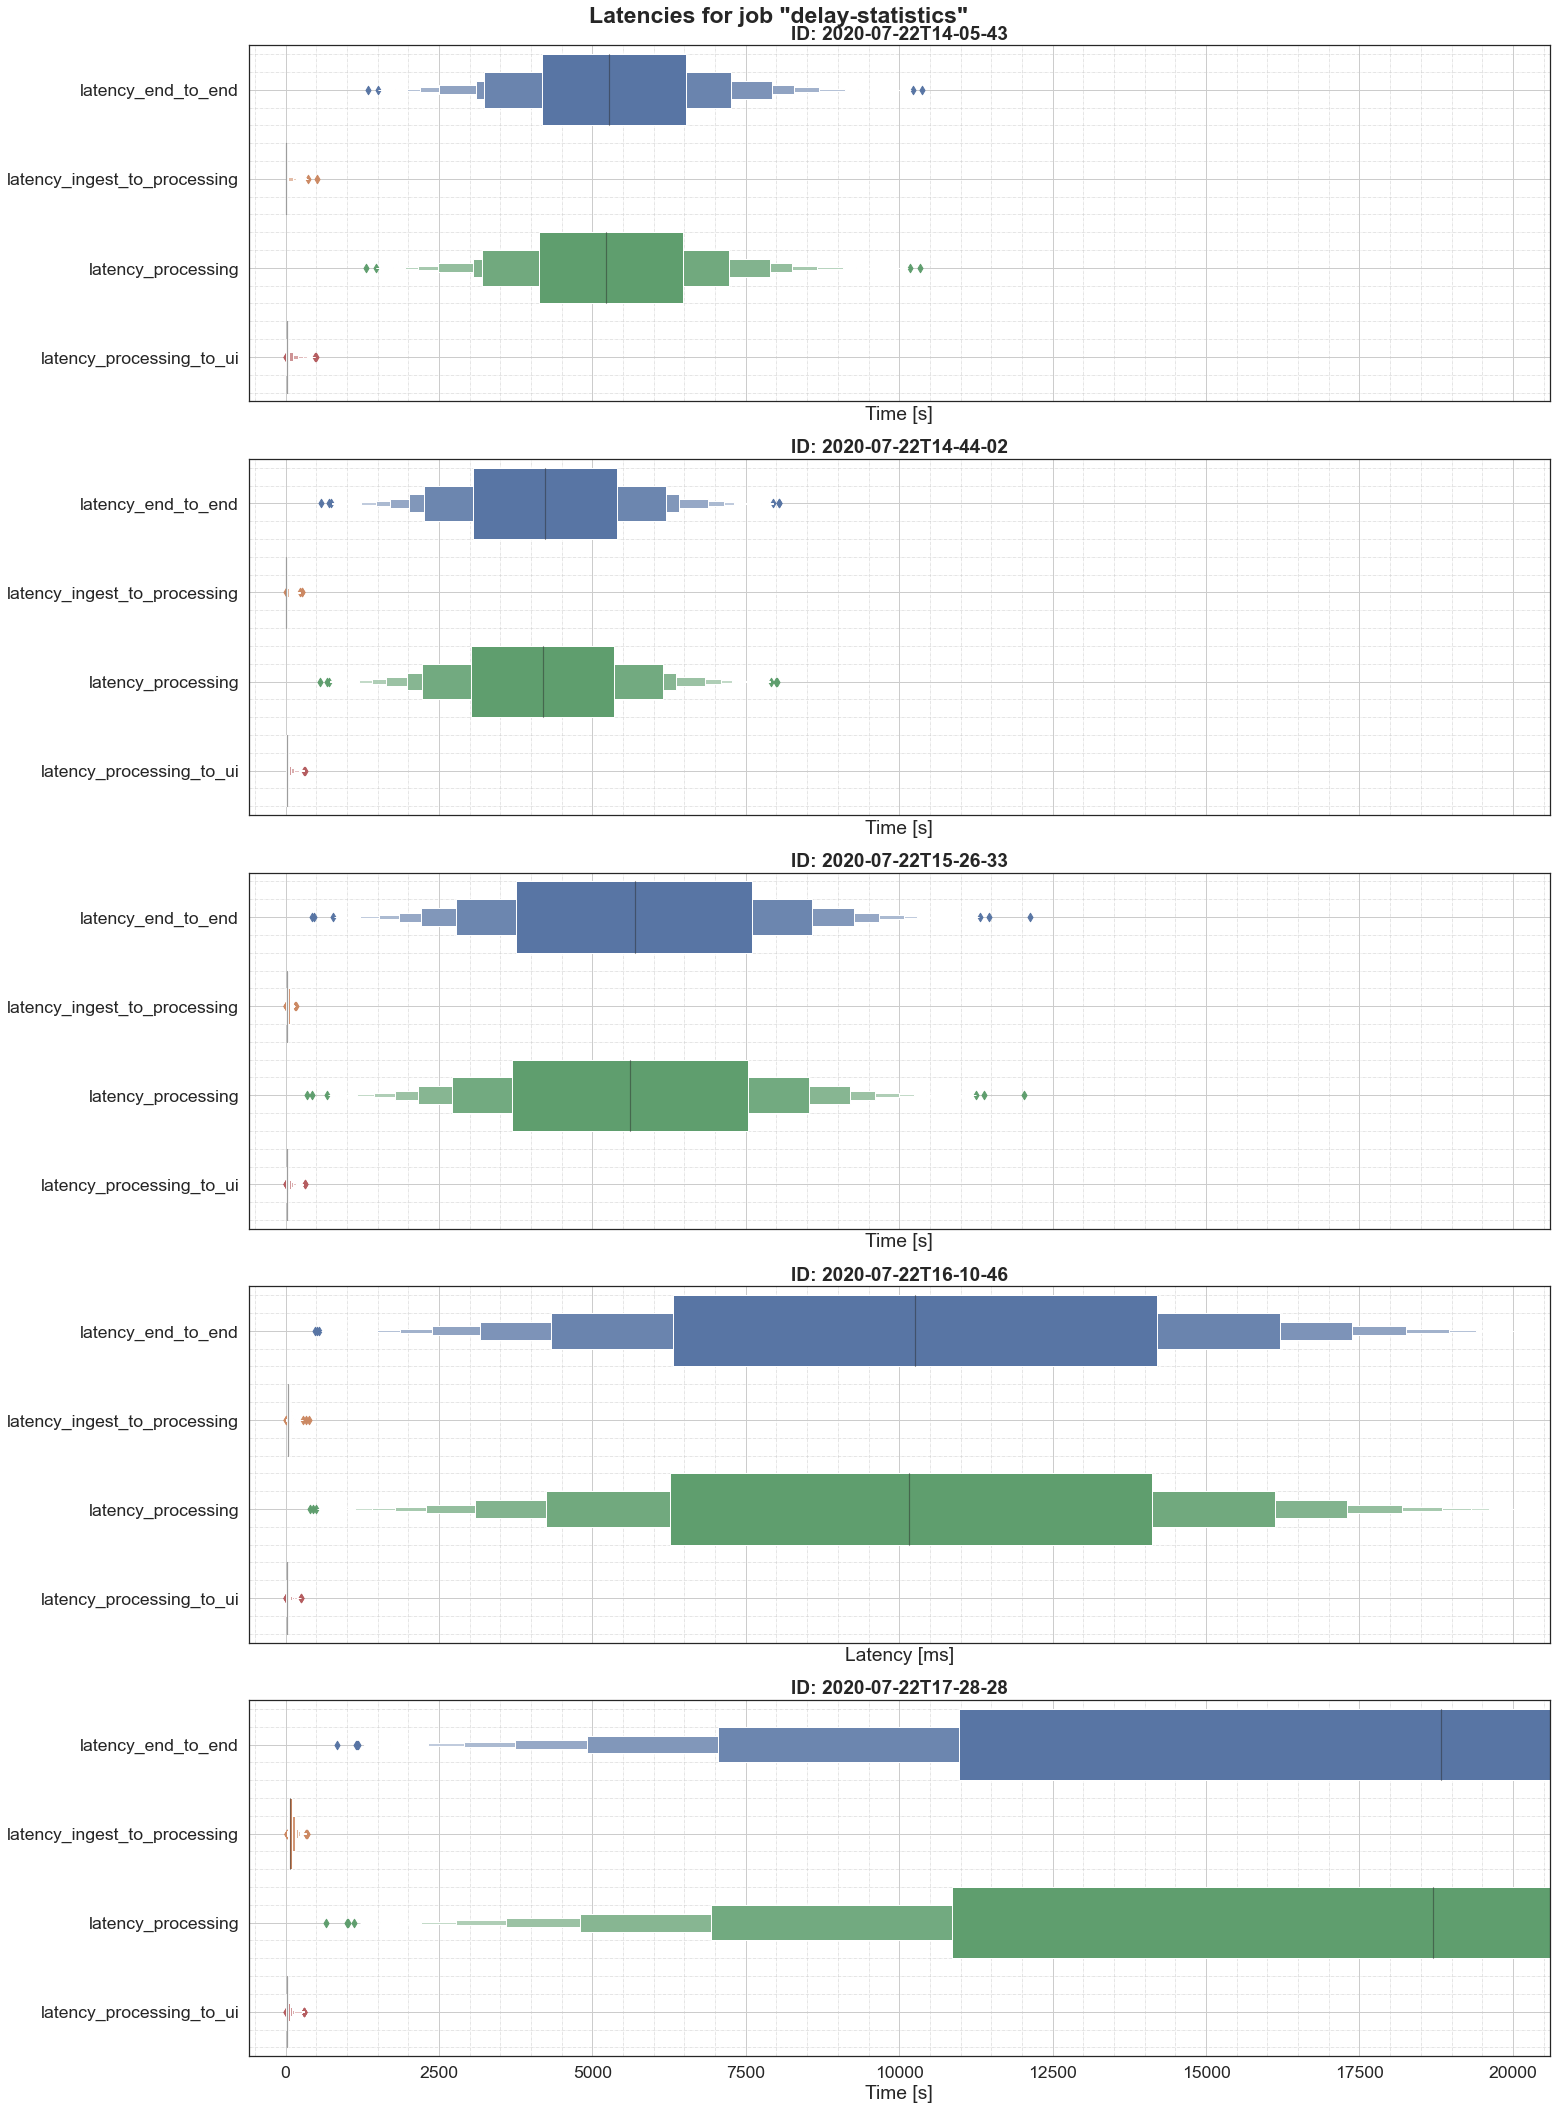

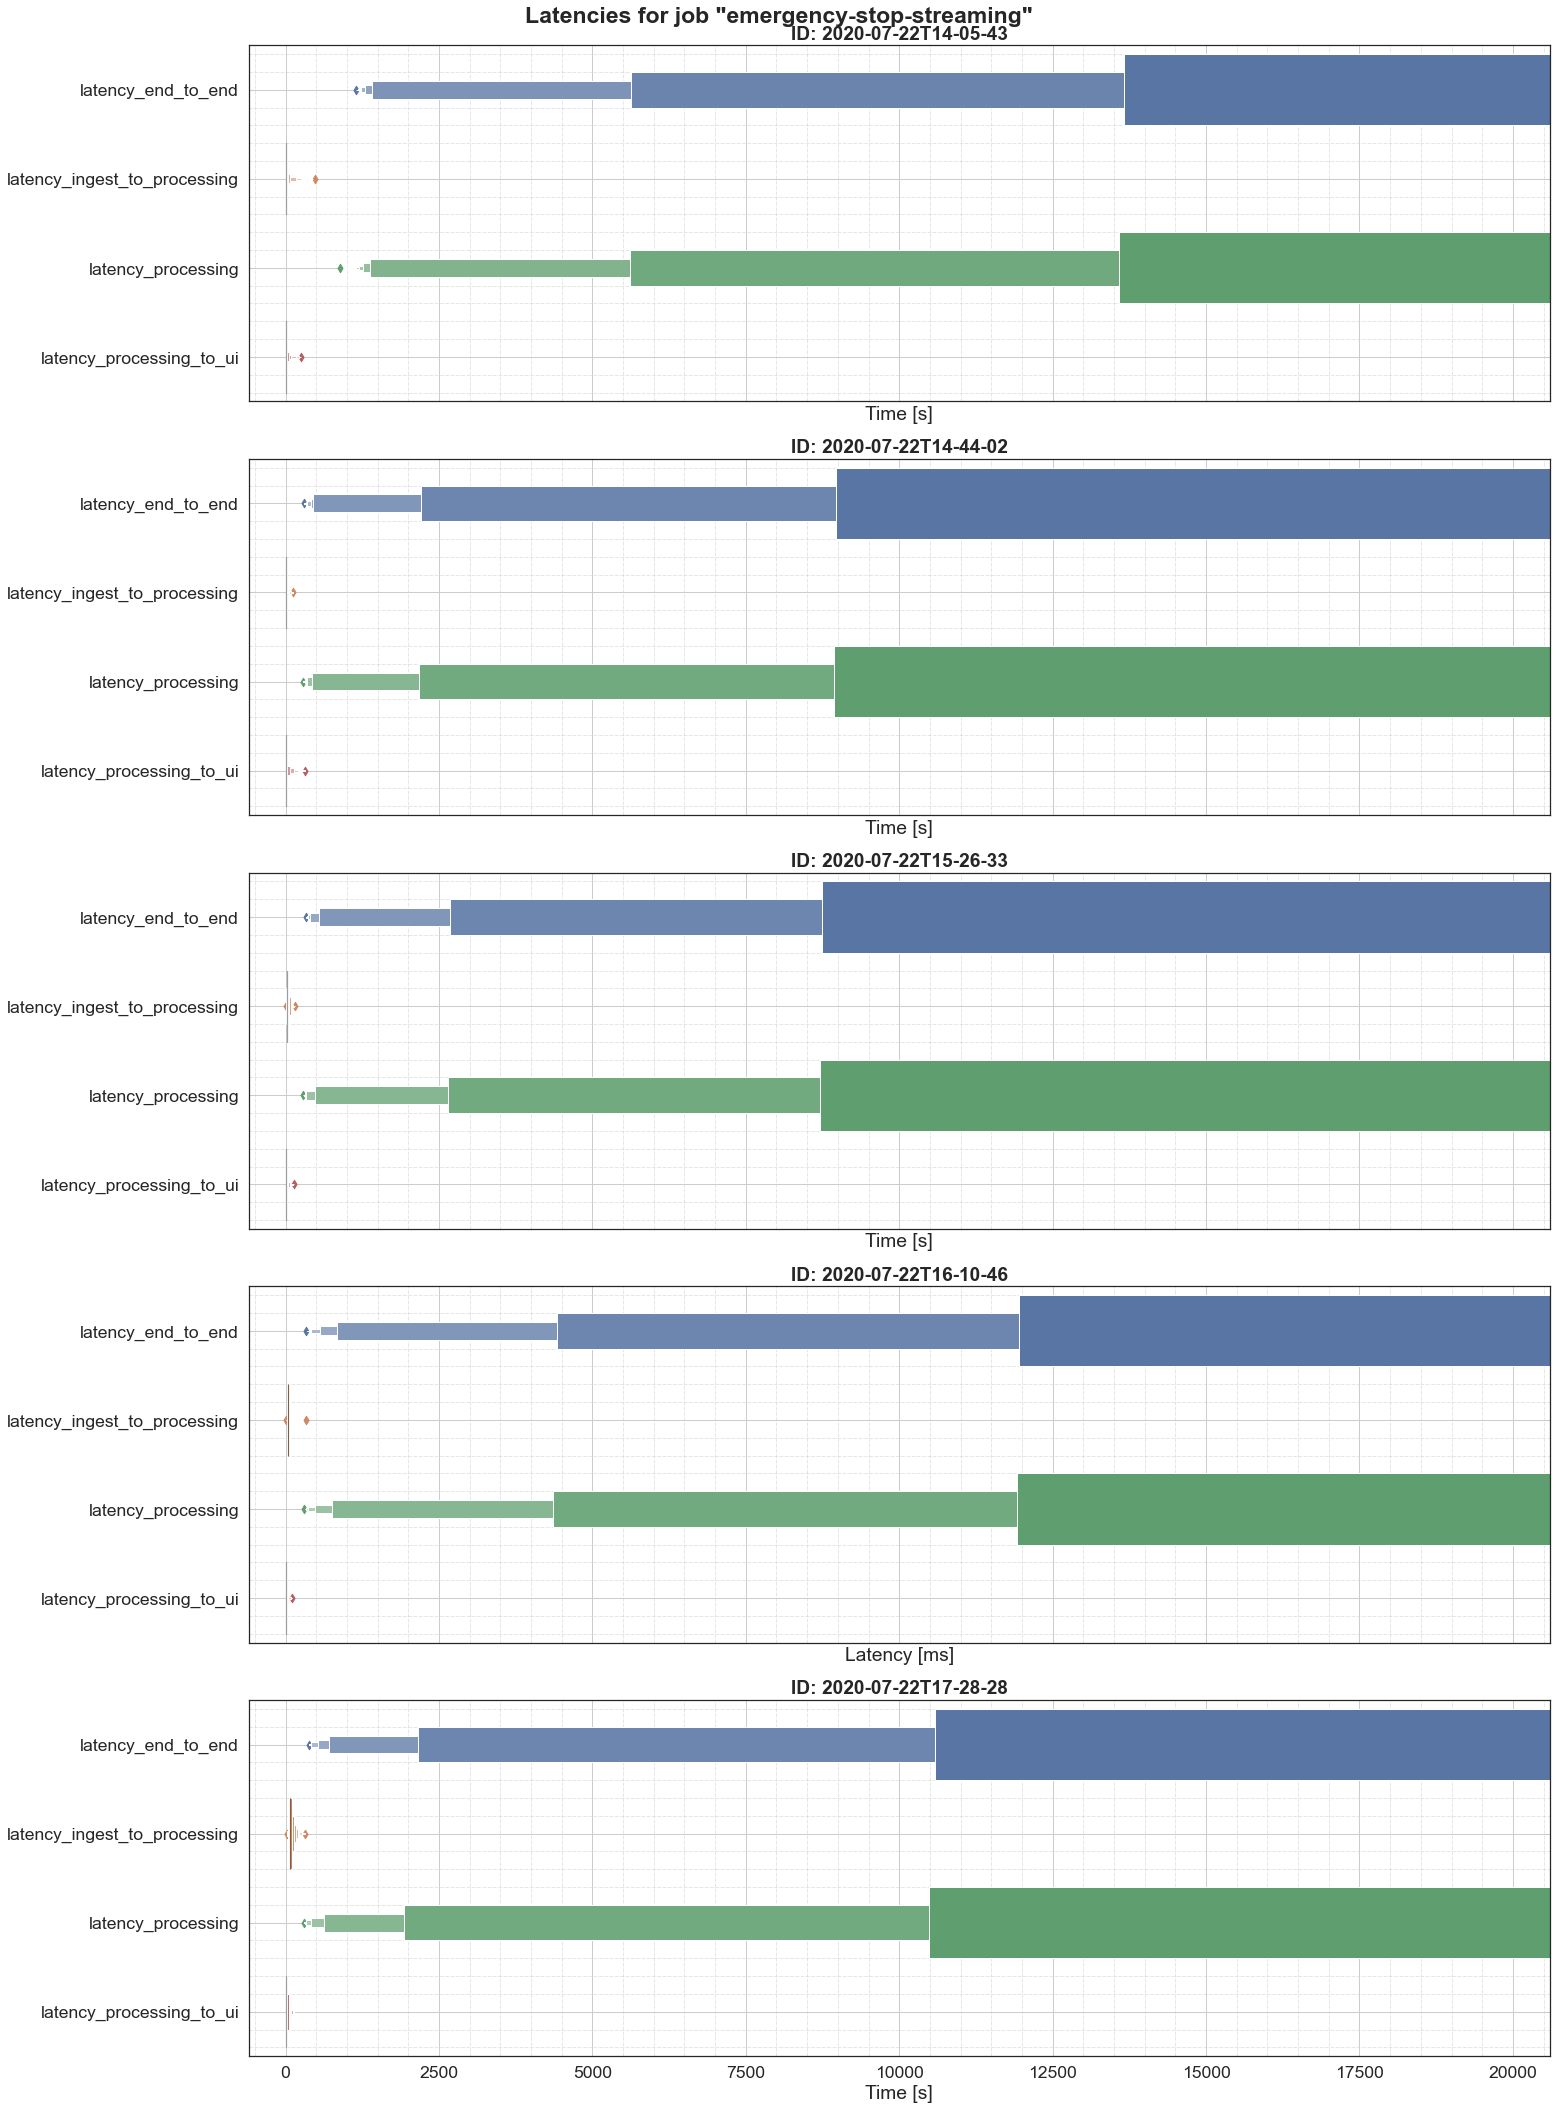

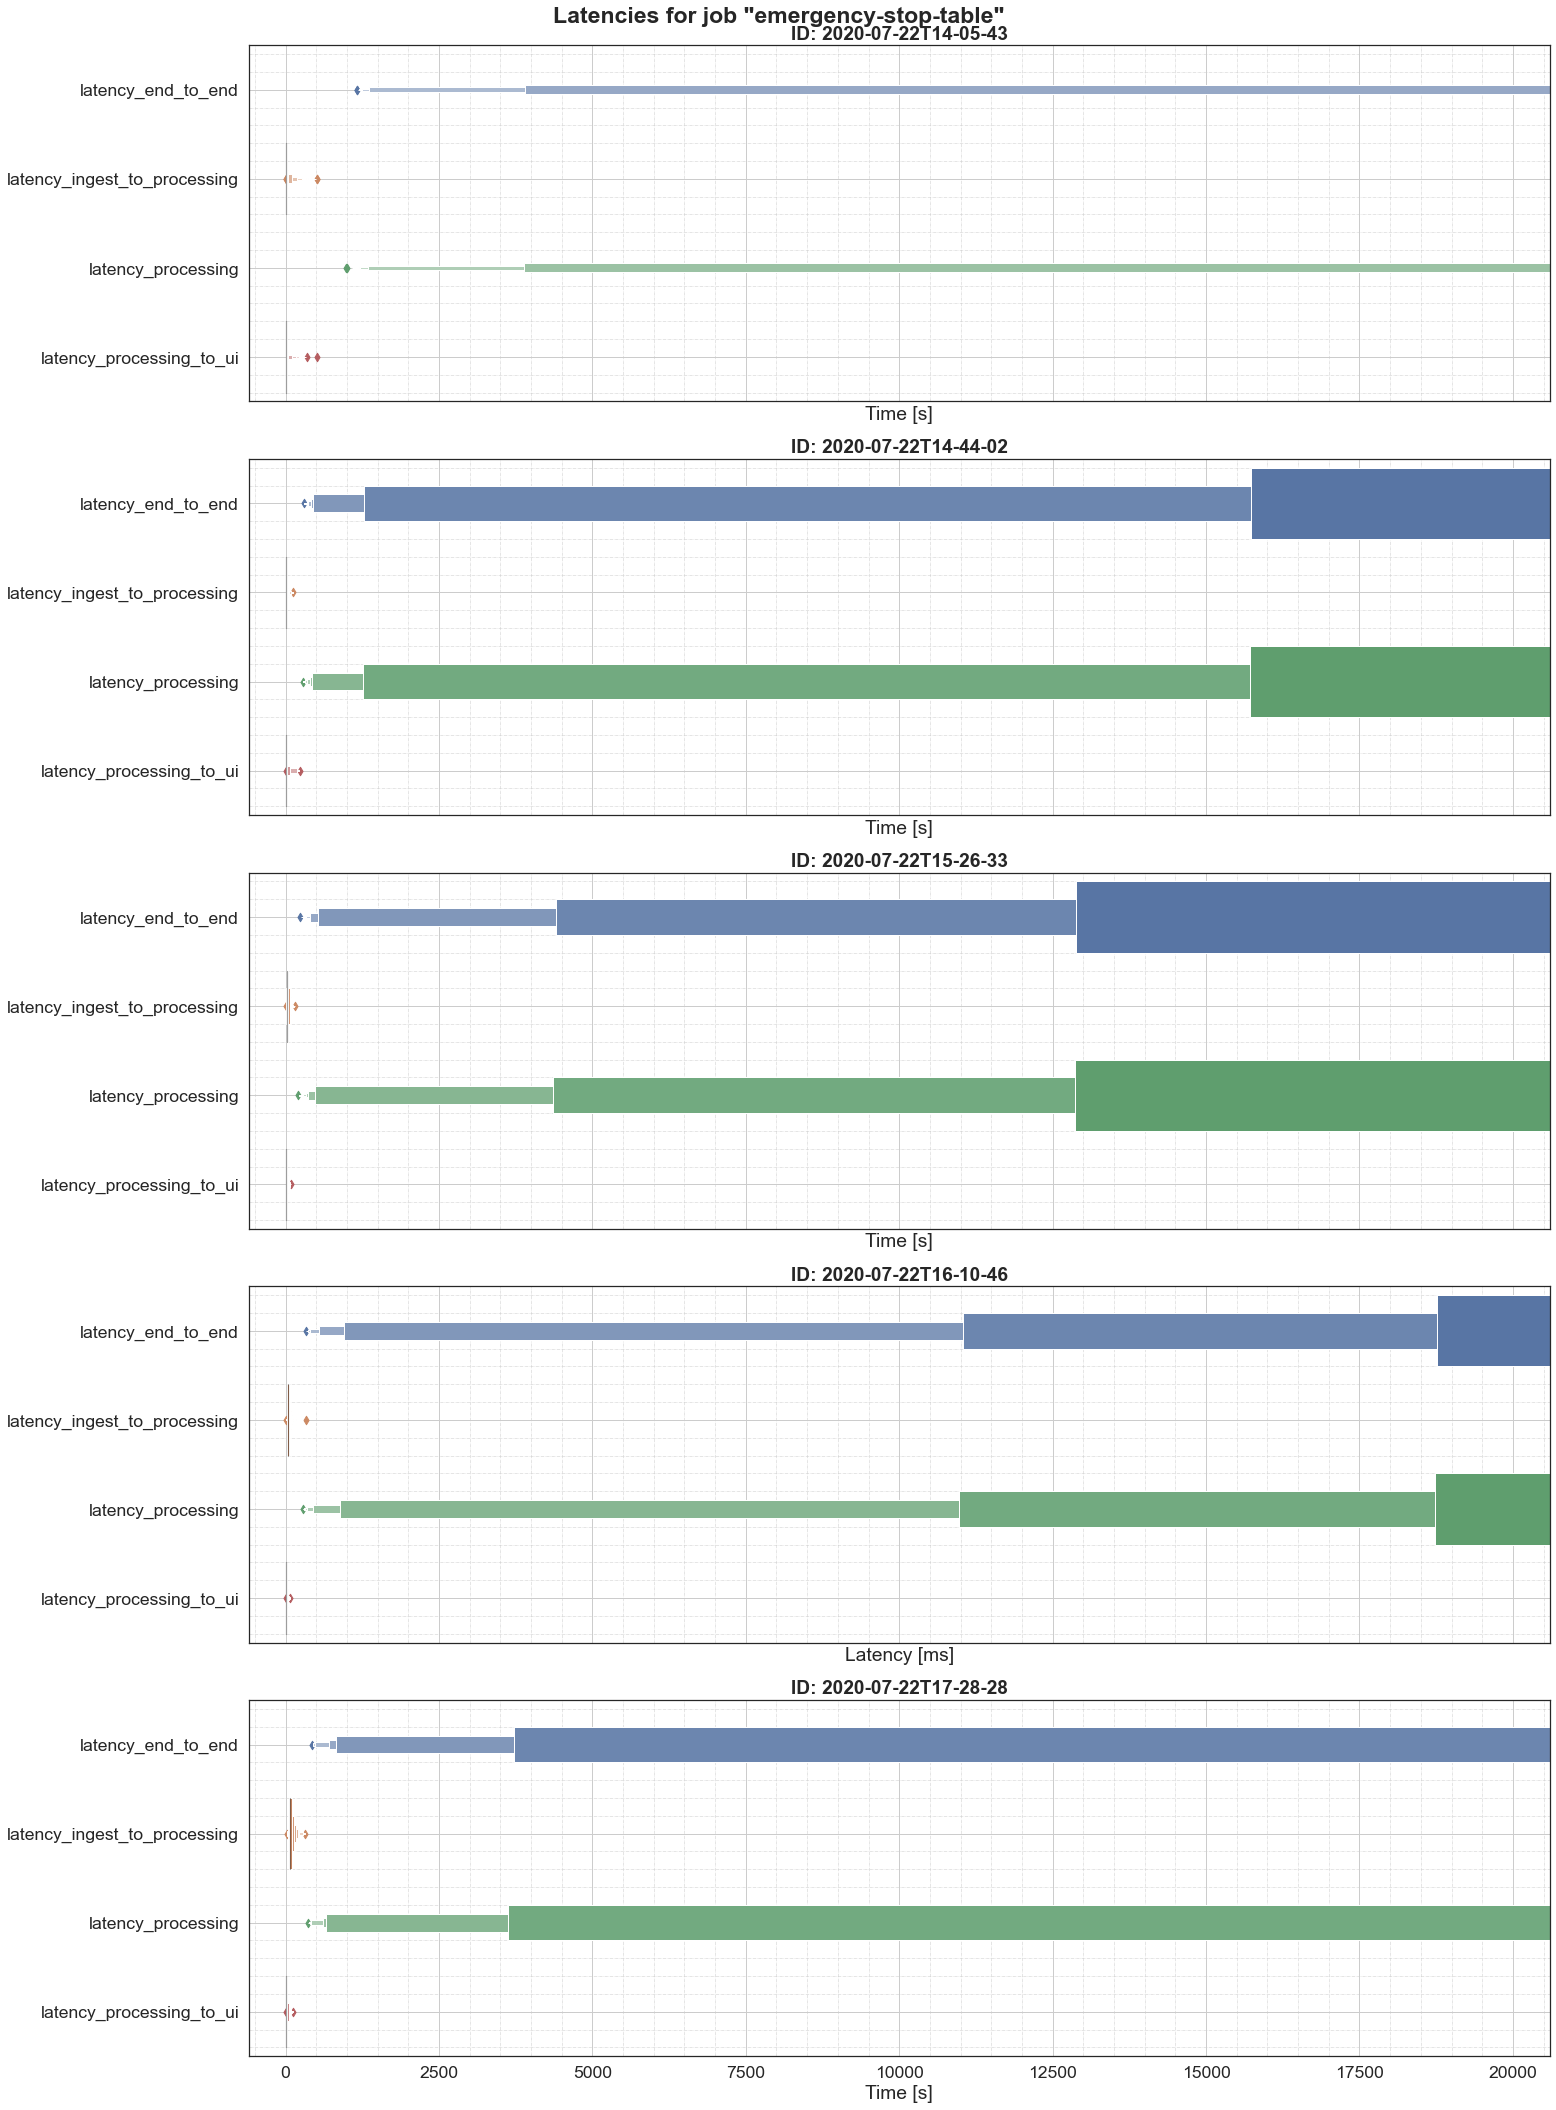

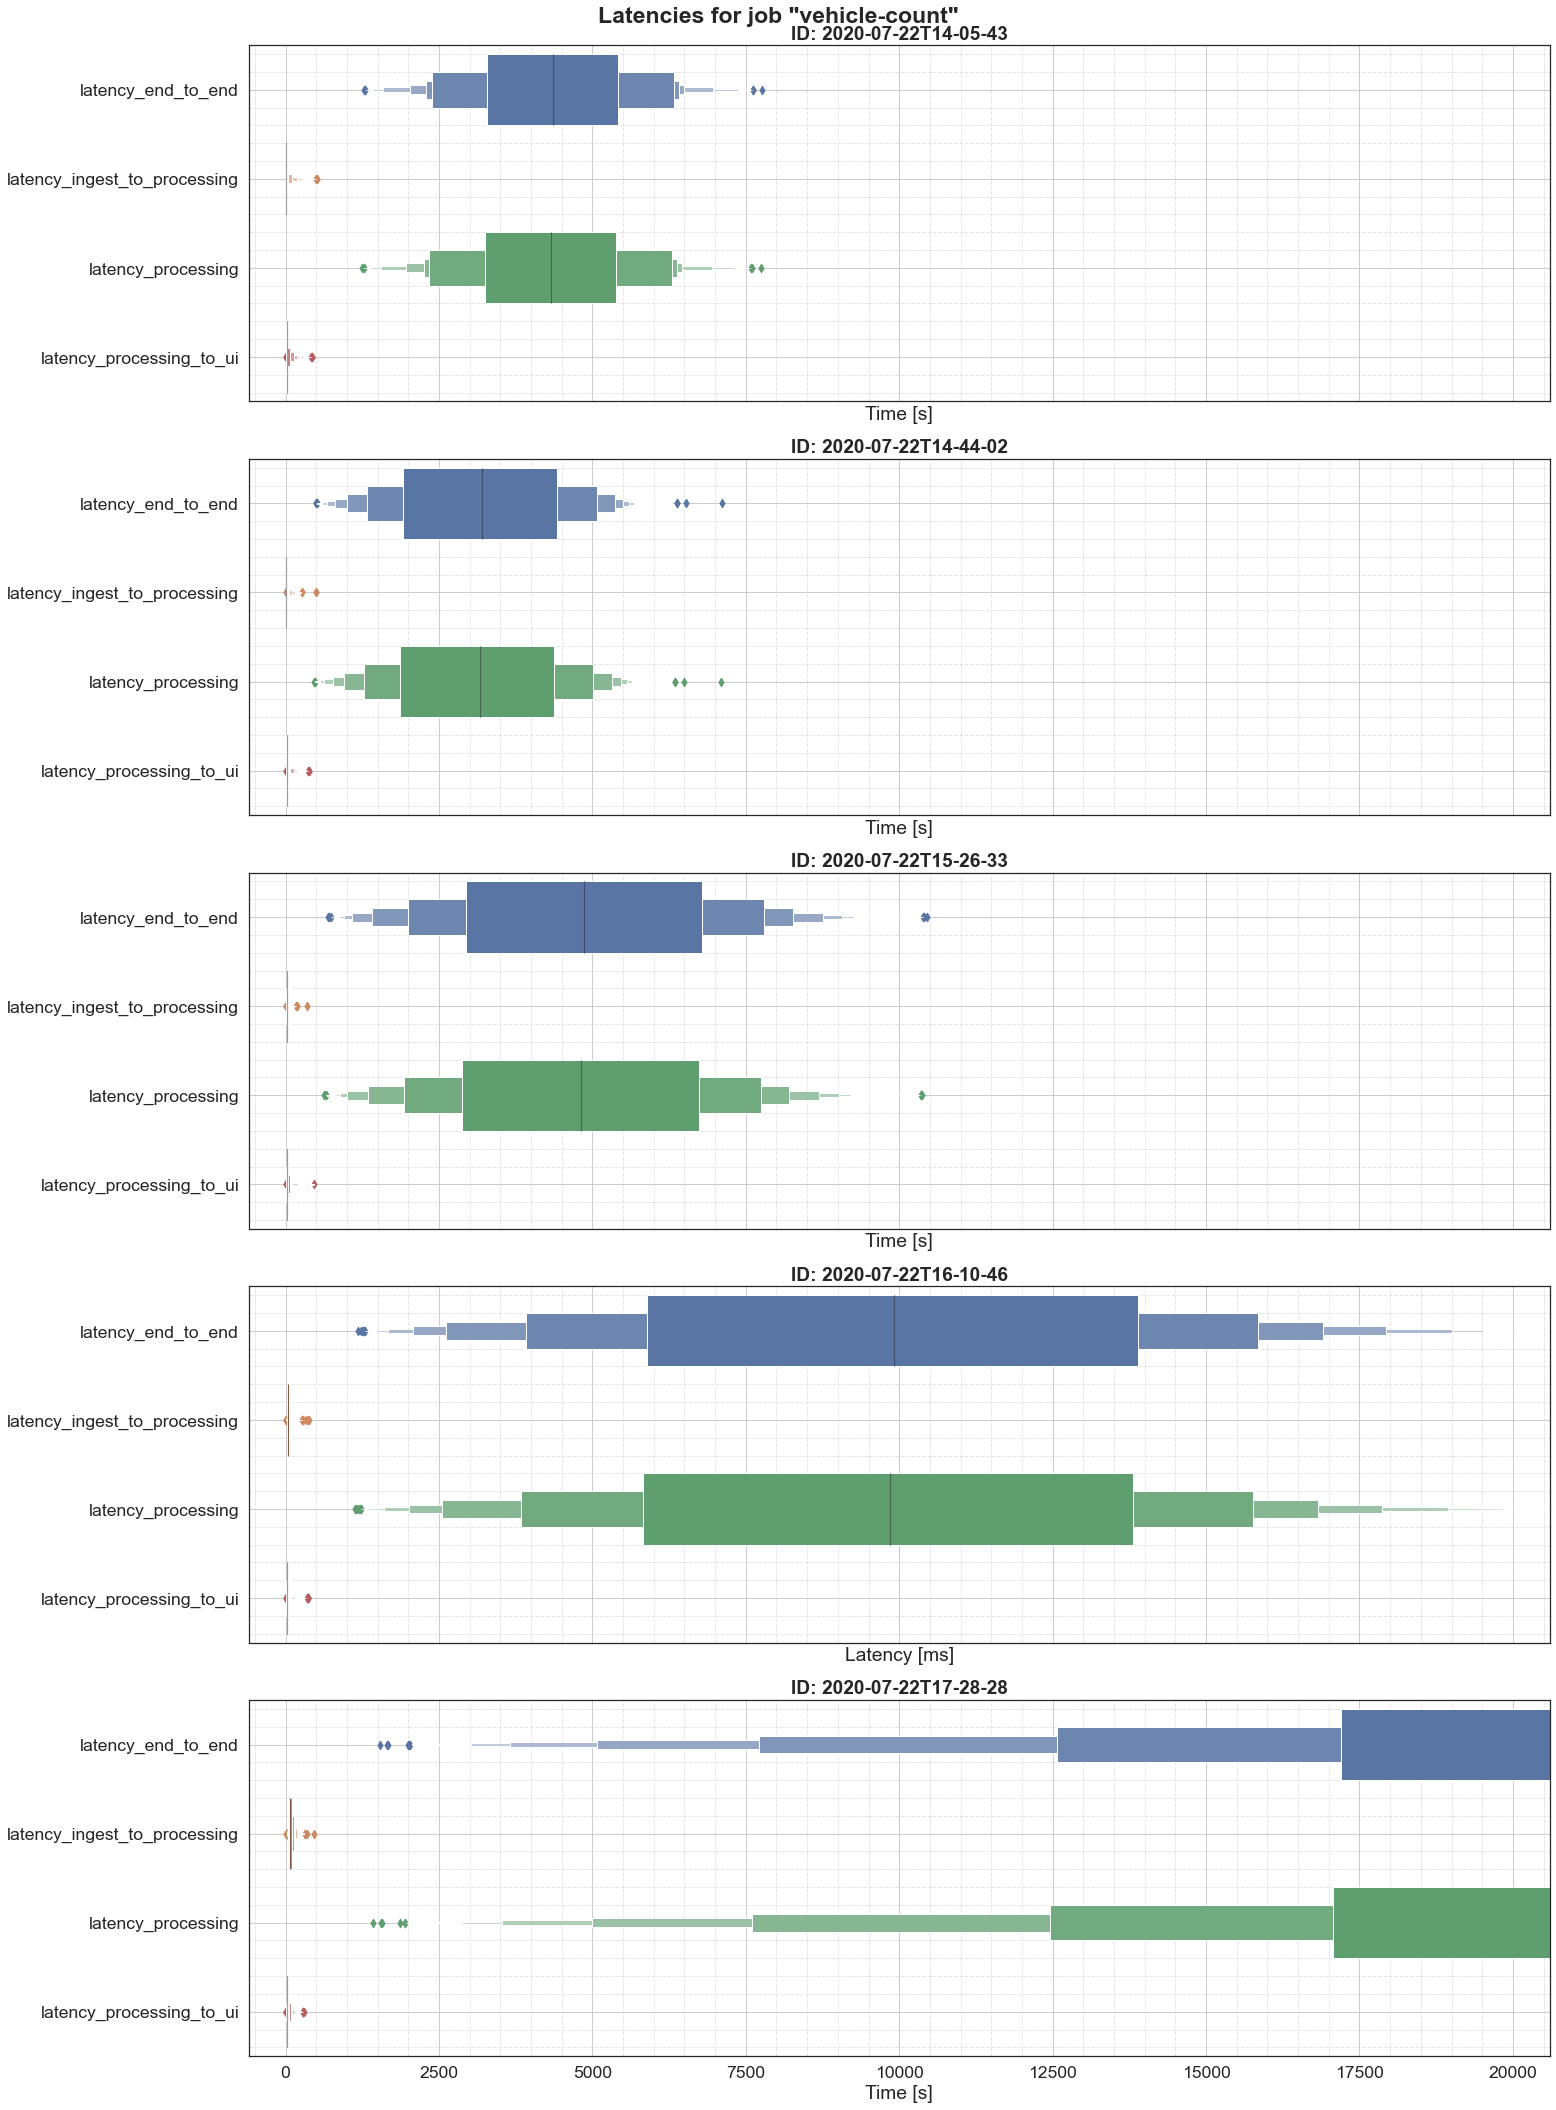

In [7]:
def plot_latency_distribution_by_job():
    latency_lim = min(20000, max_latency)
    for job in jobs:
        fig, axs = plot_subplot(n_data)
        
        fig.suptitle(f"Latencies for job \"{job}\"")
        
        for i, (did, data) in enumerate(datas.items()):
            ax = axs[i]

            sb.boxenplot(data=select_job(data, job)[latency_cols], orient="h", ax=ax)
            ax.set_xlim([-axislim_margin * latency_lim, latency_lim * (1 + axislim_margin)])
            ax.set_title(f"ID: {did}")
            ax.set_xlabel("Time [s]")
            if i+1 == len(jobs):
                ax.set_xlabel("Latency [ms]")
        
        plot_format(fig, space_factor=2)
        plot_save(f"latency_distribution_by_job_{job}")
    
plot_latency_distribution_by_job()

## End-to-End Latency distribution by Volume Scale

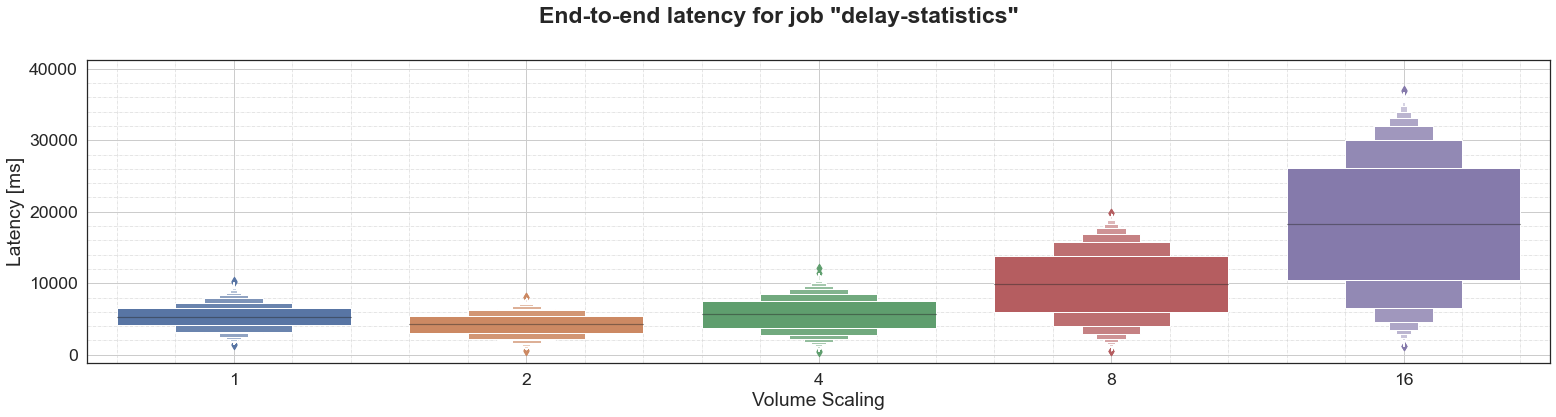

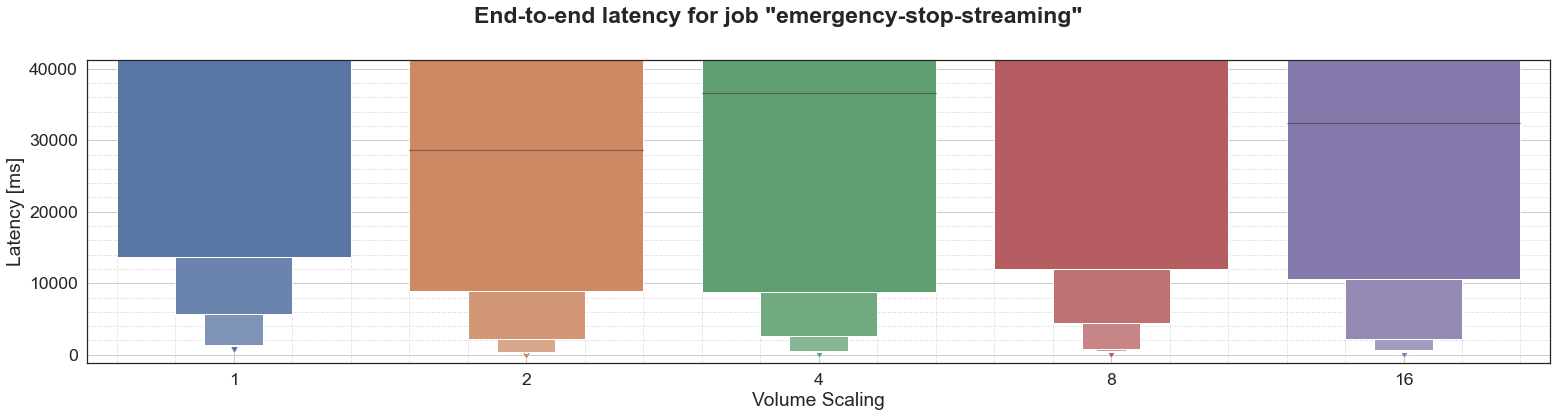

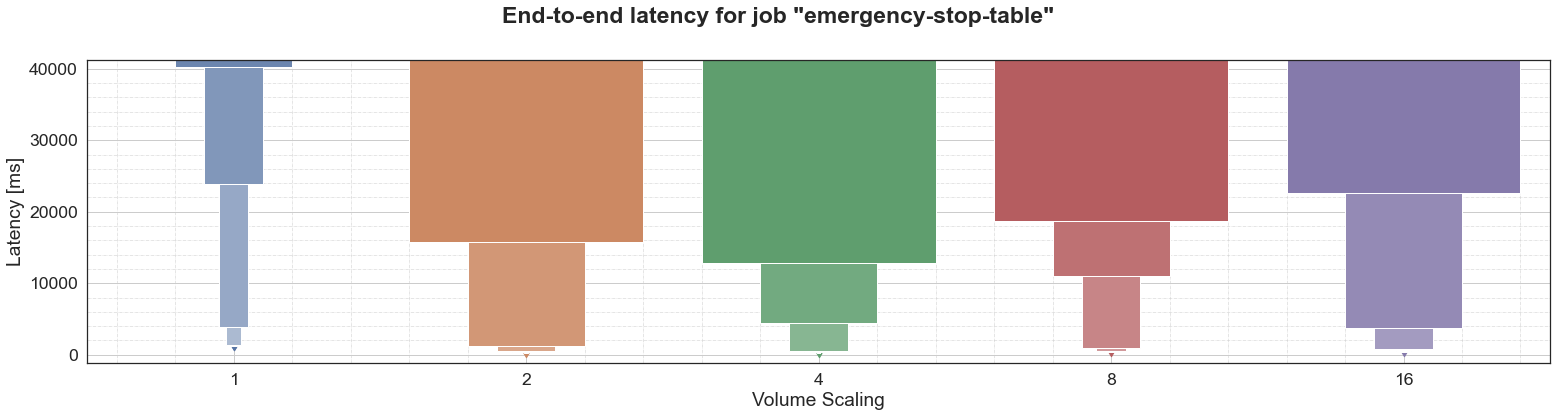

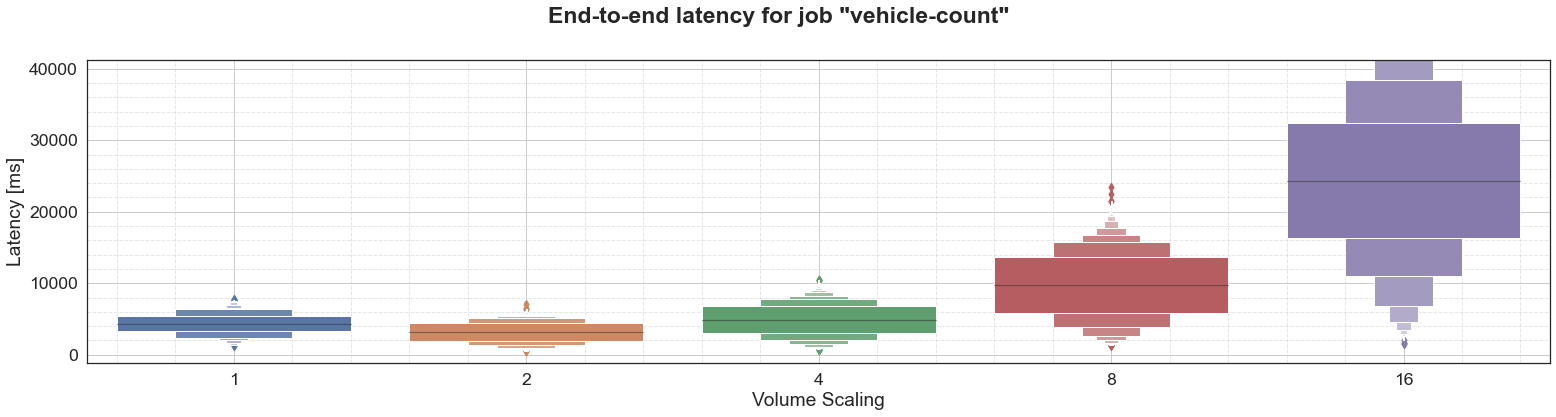

In [12]:
def plot_latency_distribution_by_scale():
    latency_lim = min(40000, max_latency)
    for job in jobs:
        fig, axs = plot_subplot()
        ax = axs[0]
        
        fig.suptitle(f"End-to-end latency for job \"{job}\"")
        
        data = pd.DataFrame()
        for volume_scale, dids in volume_scales.items():
            data[volume_scale] = pd.concat([select_job(datas[did], job)["latency_end_to_end"] for did in dids], ignore_index=True)
        data = data.reindex(sorted(data.columns), axis=1)

        sb.boxenplot(data=data, ax=ax)
        ax.set_ylim([-axislim_margin * latency_lim, latency_lim * (1 + axislim_margin)])
        ax.set_xlabel("Volume Scaling")
        ax.set_ylabel("Latency [ms]")
        
        plot_format(fig, space_factor=2)
        plot_save(f"latency_distribution_by_scale_{job}")
    
plot_latency_distribution_by_scale()

## Latency over time per job

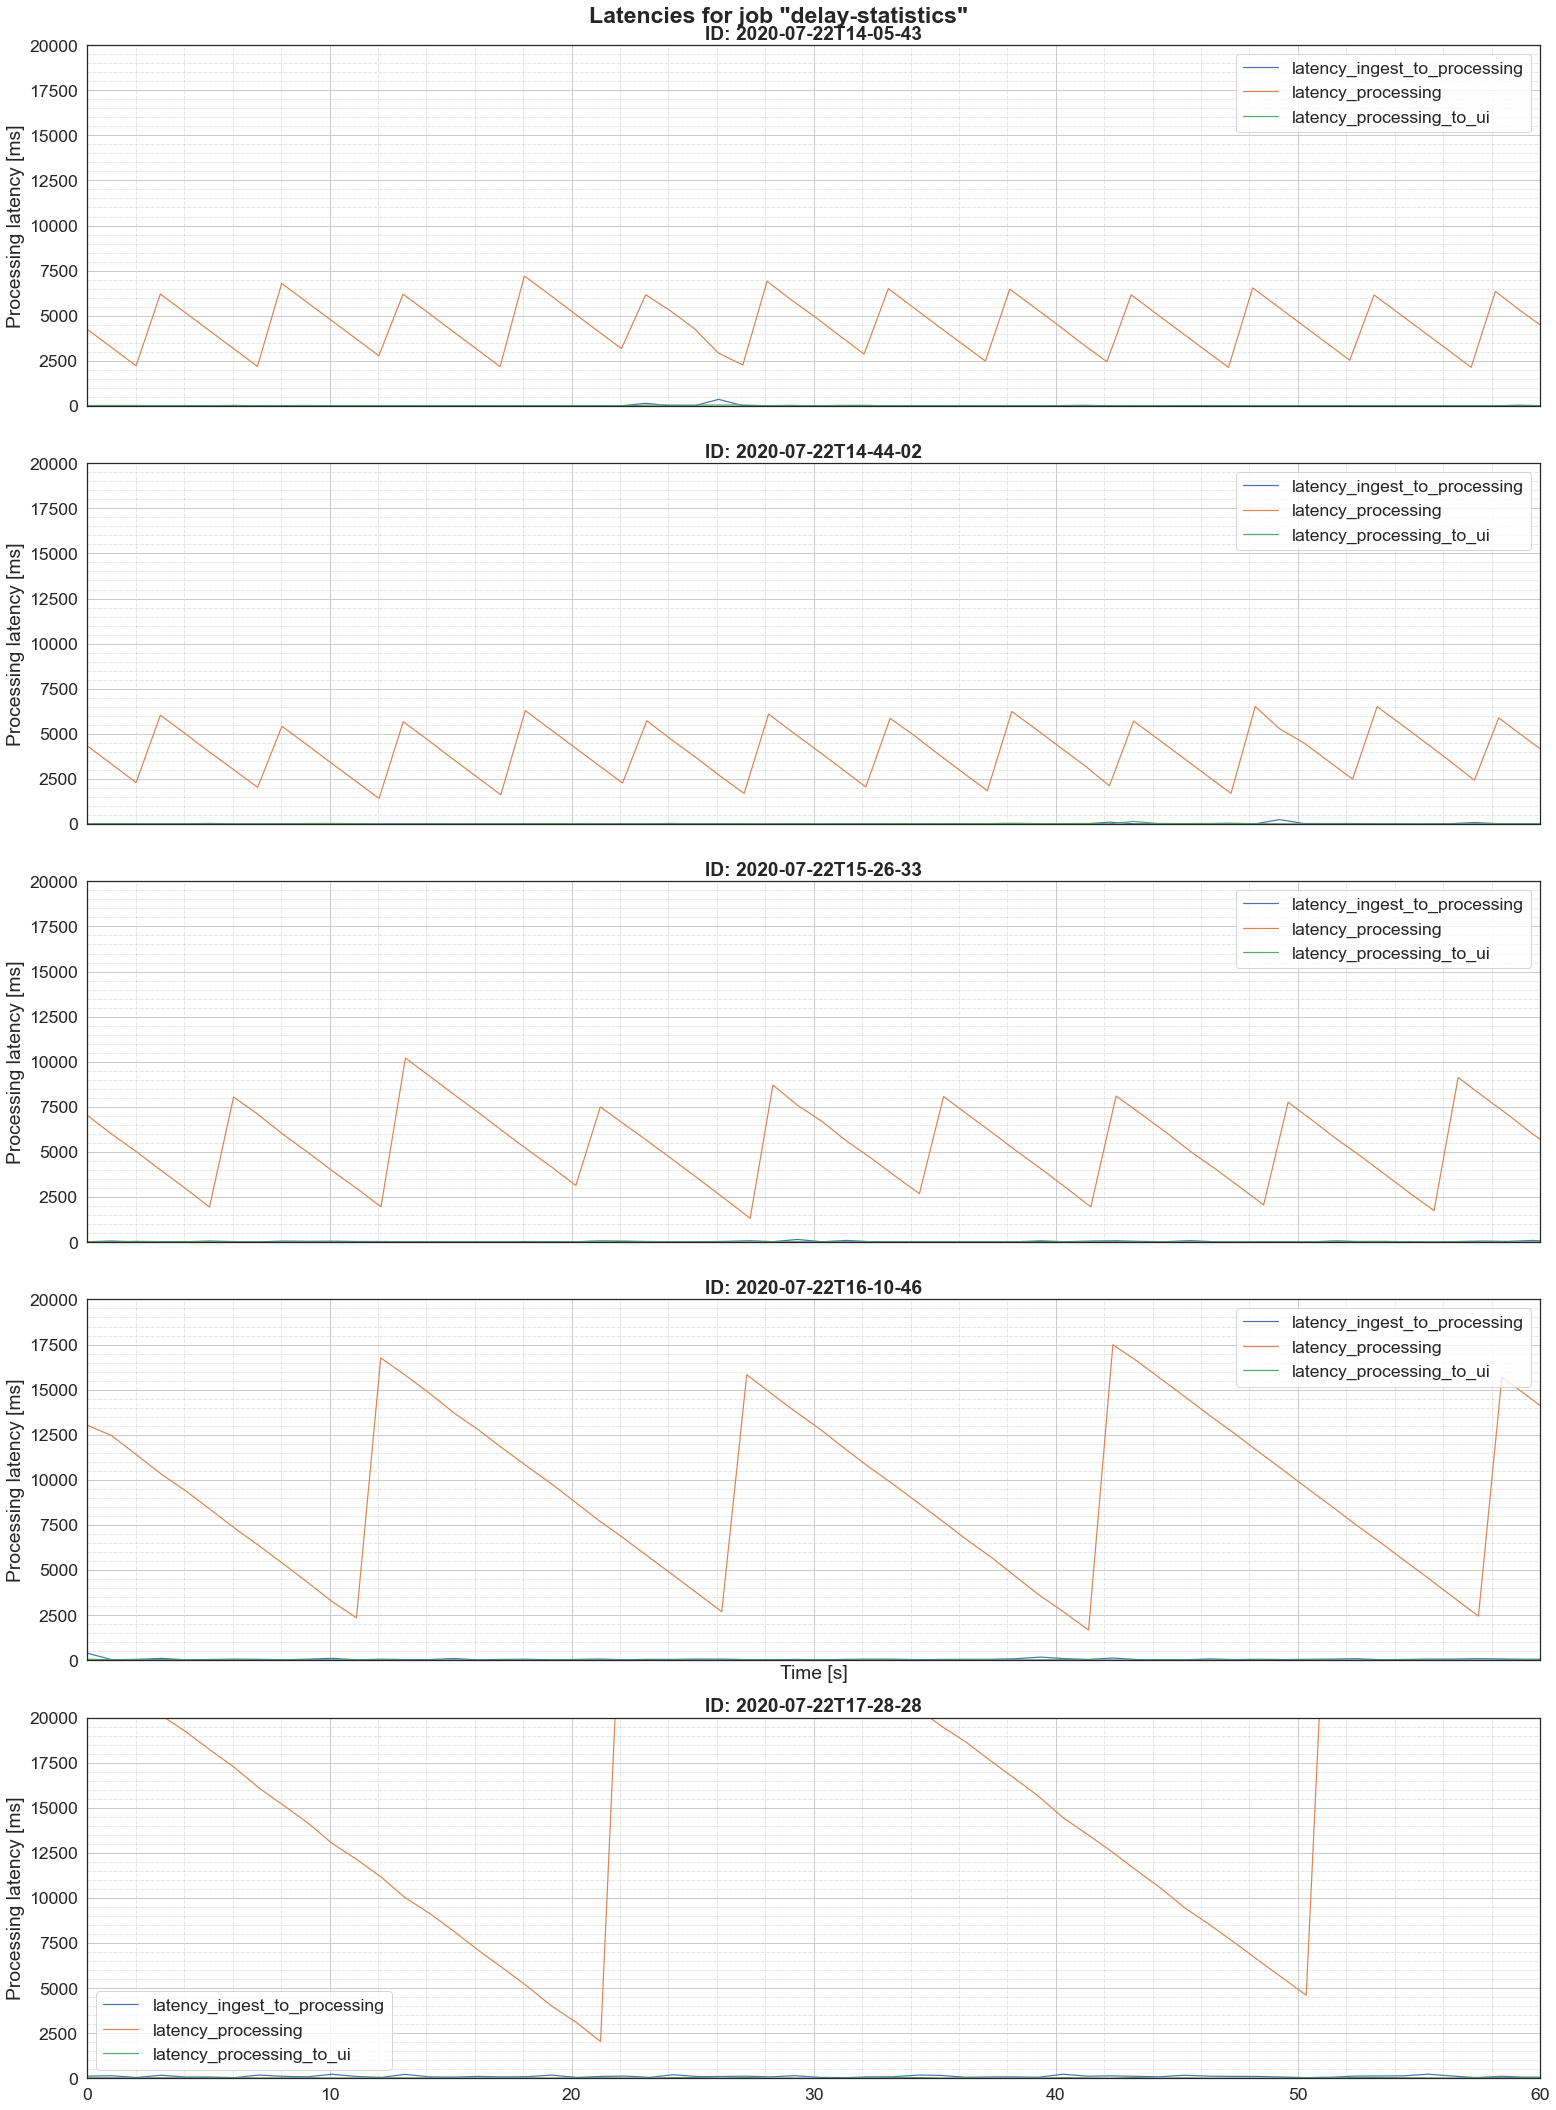

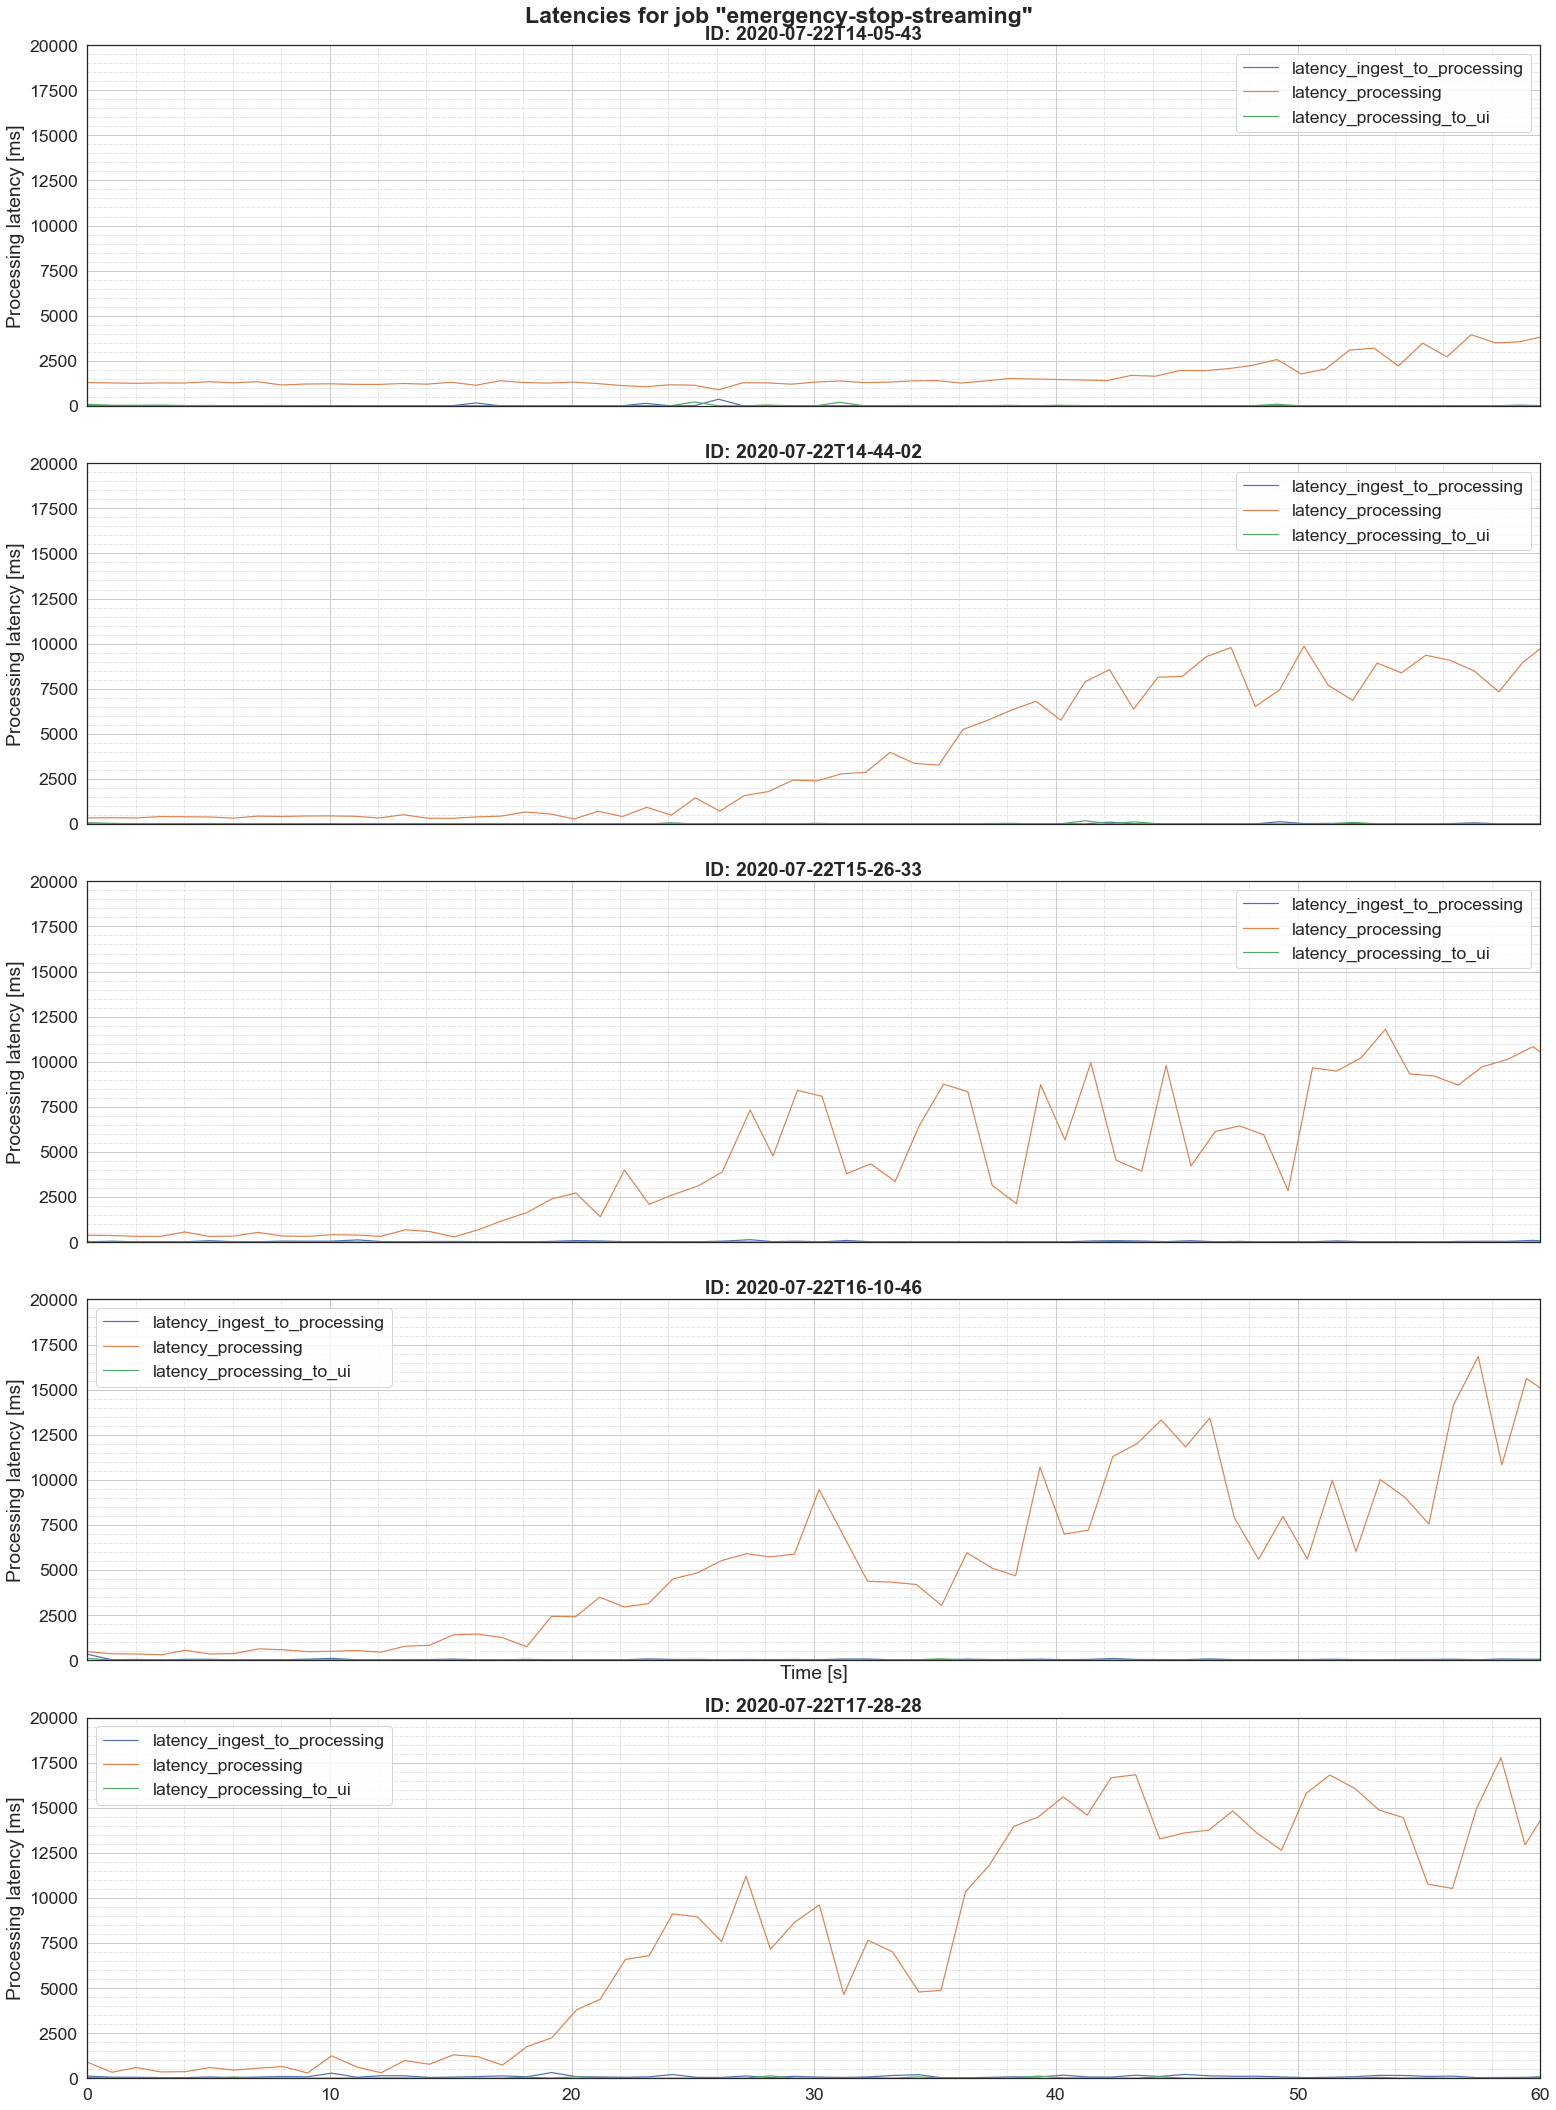

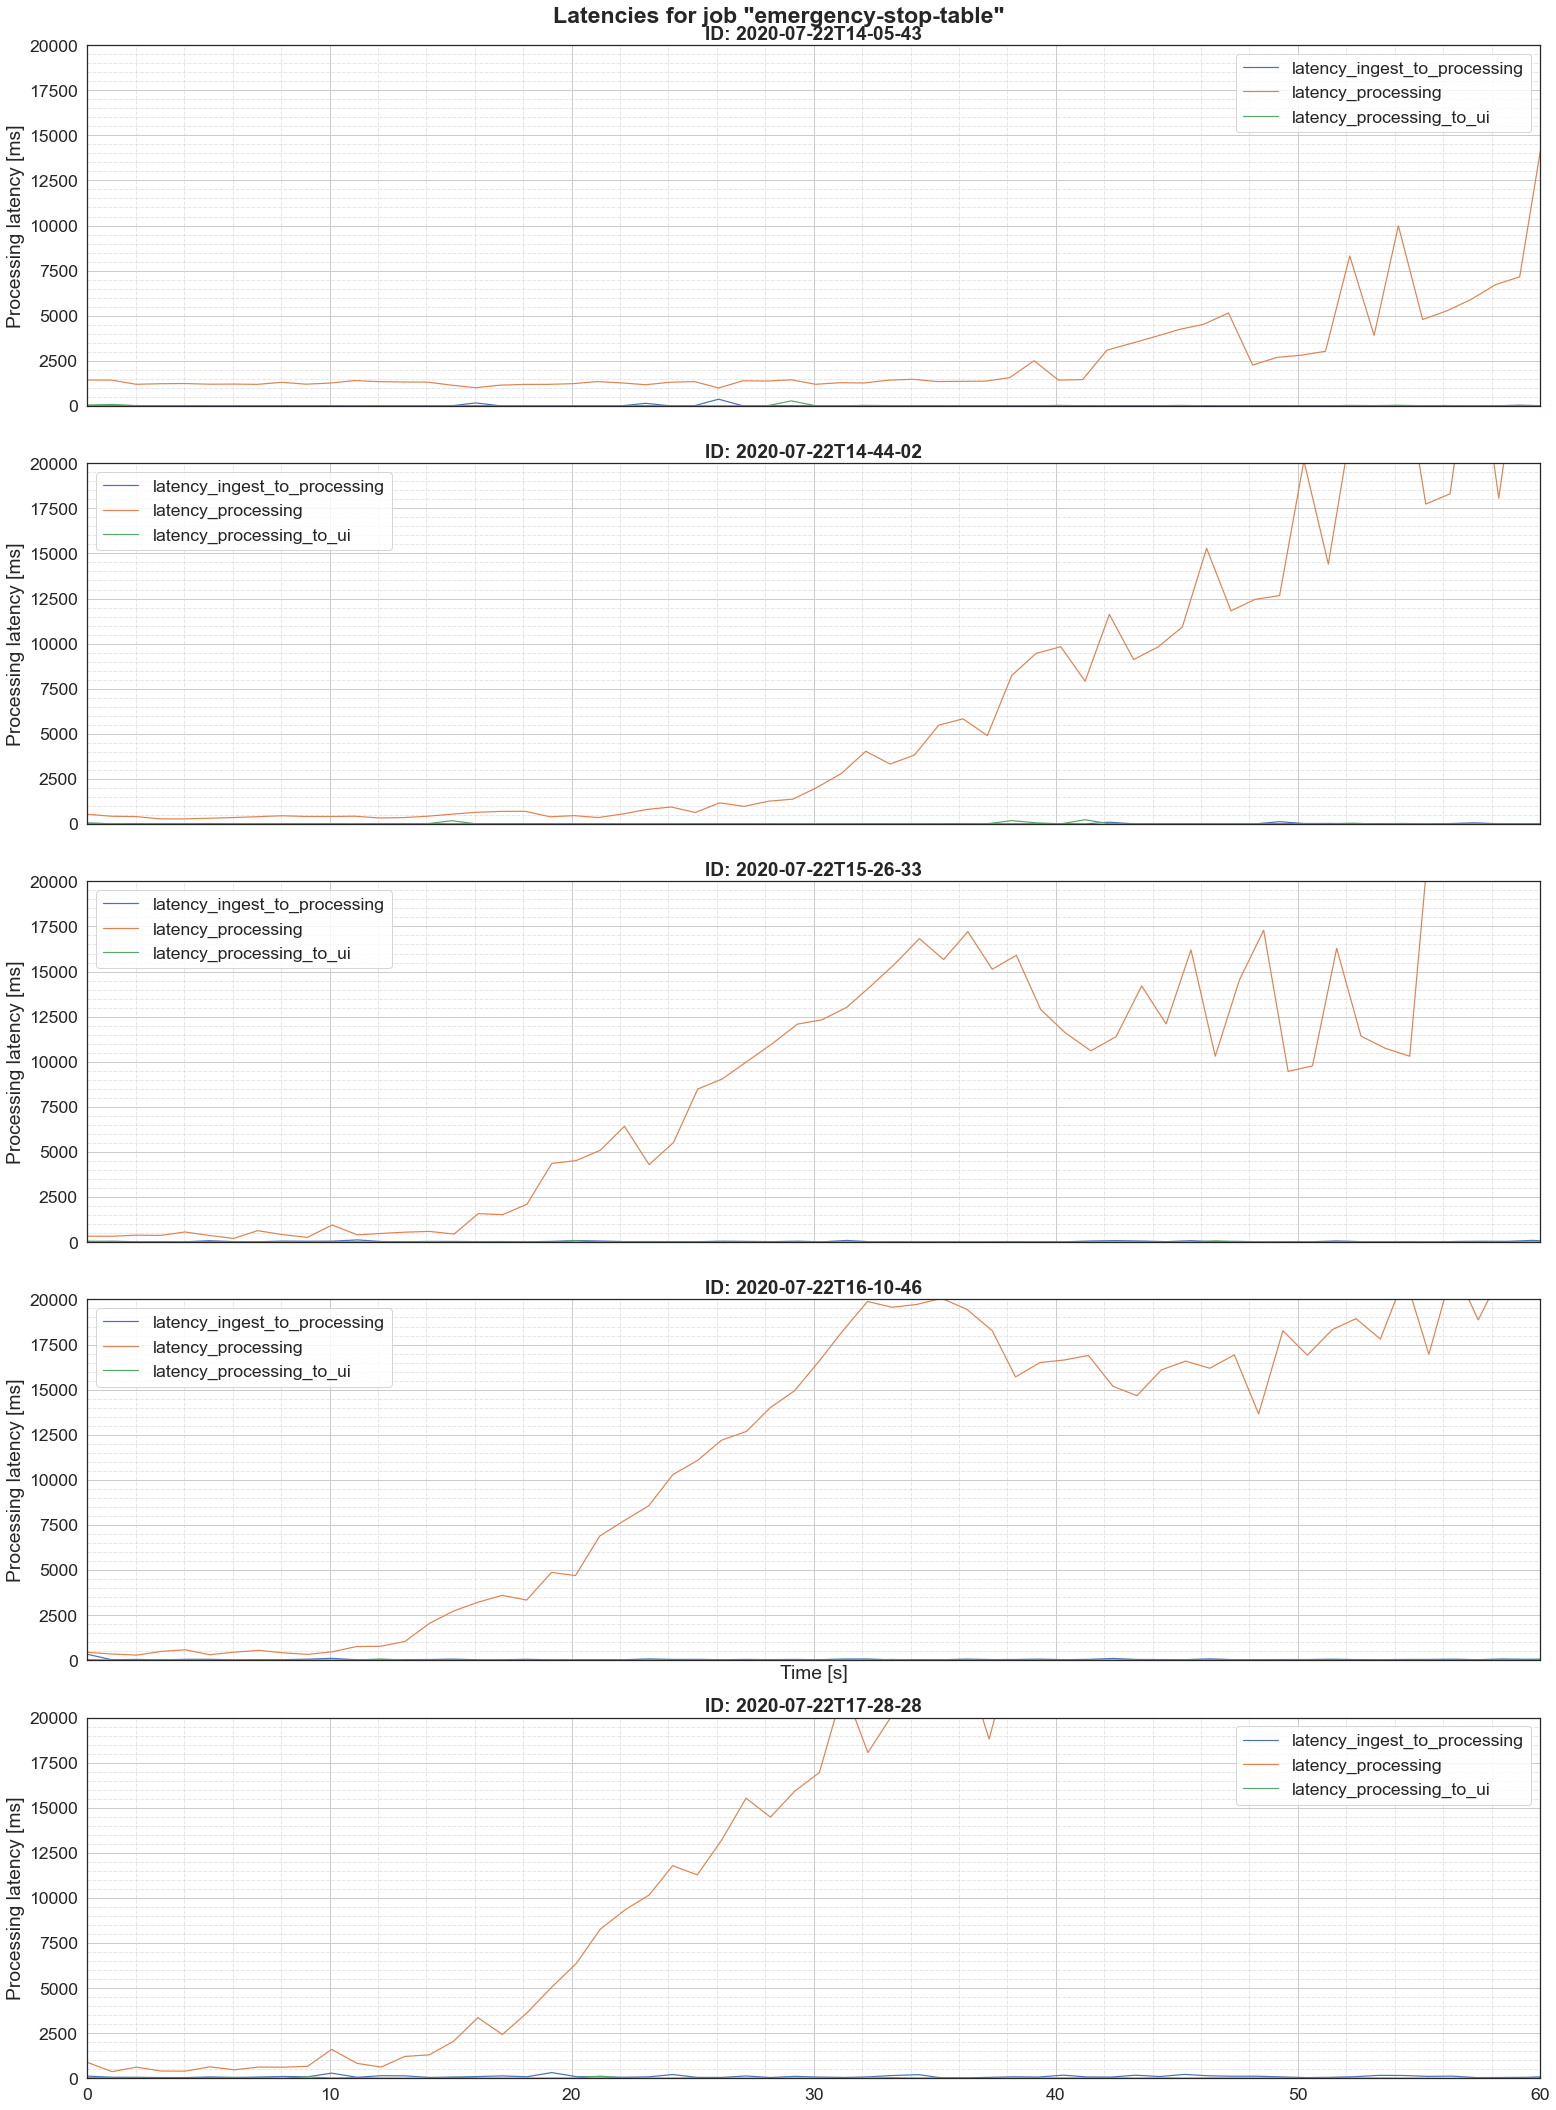

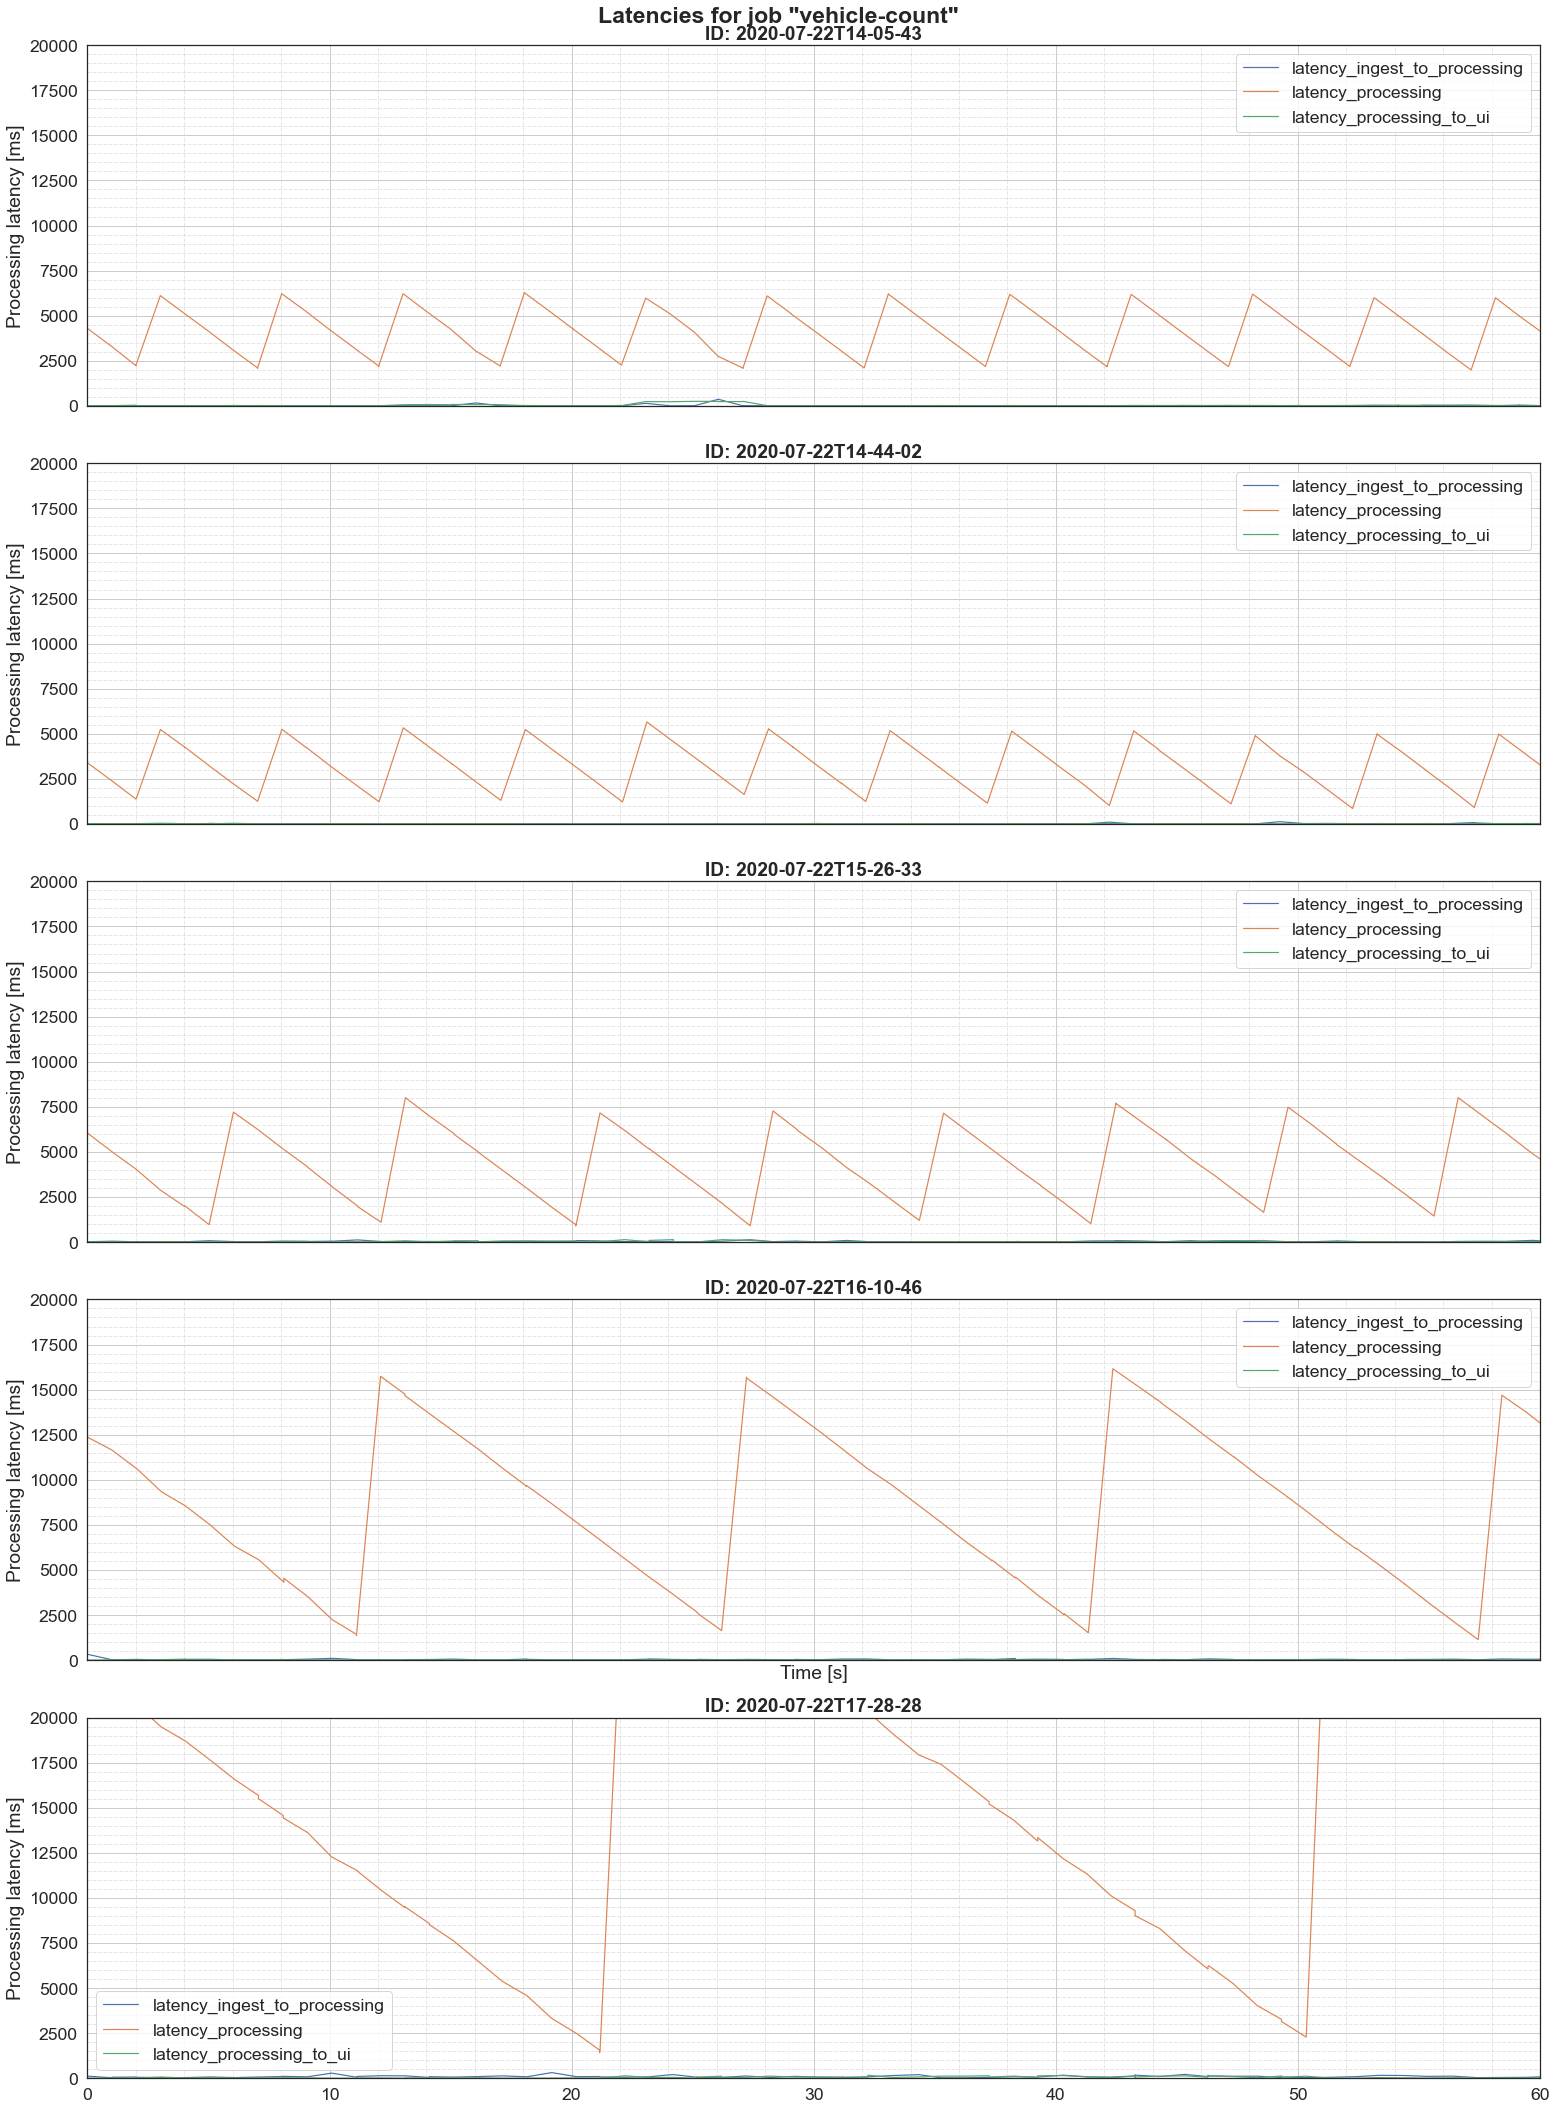

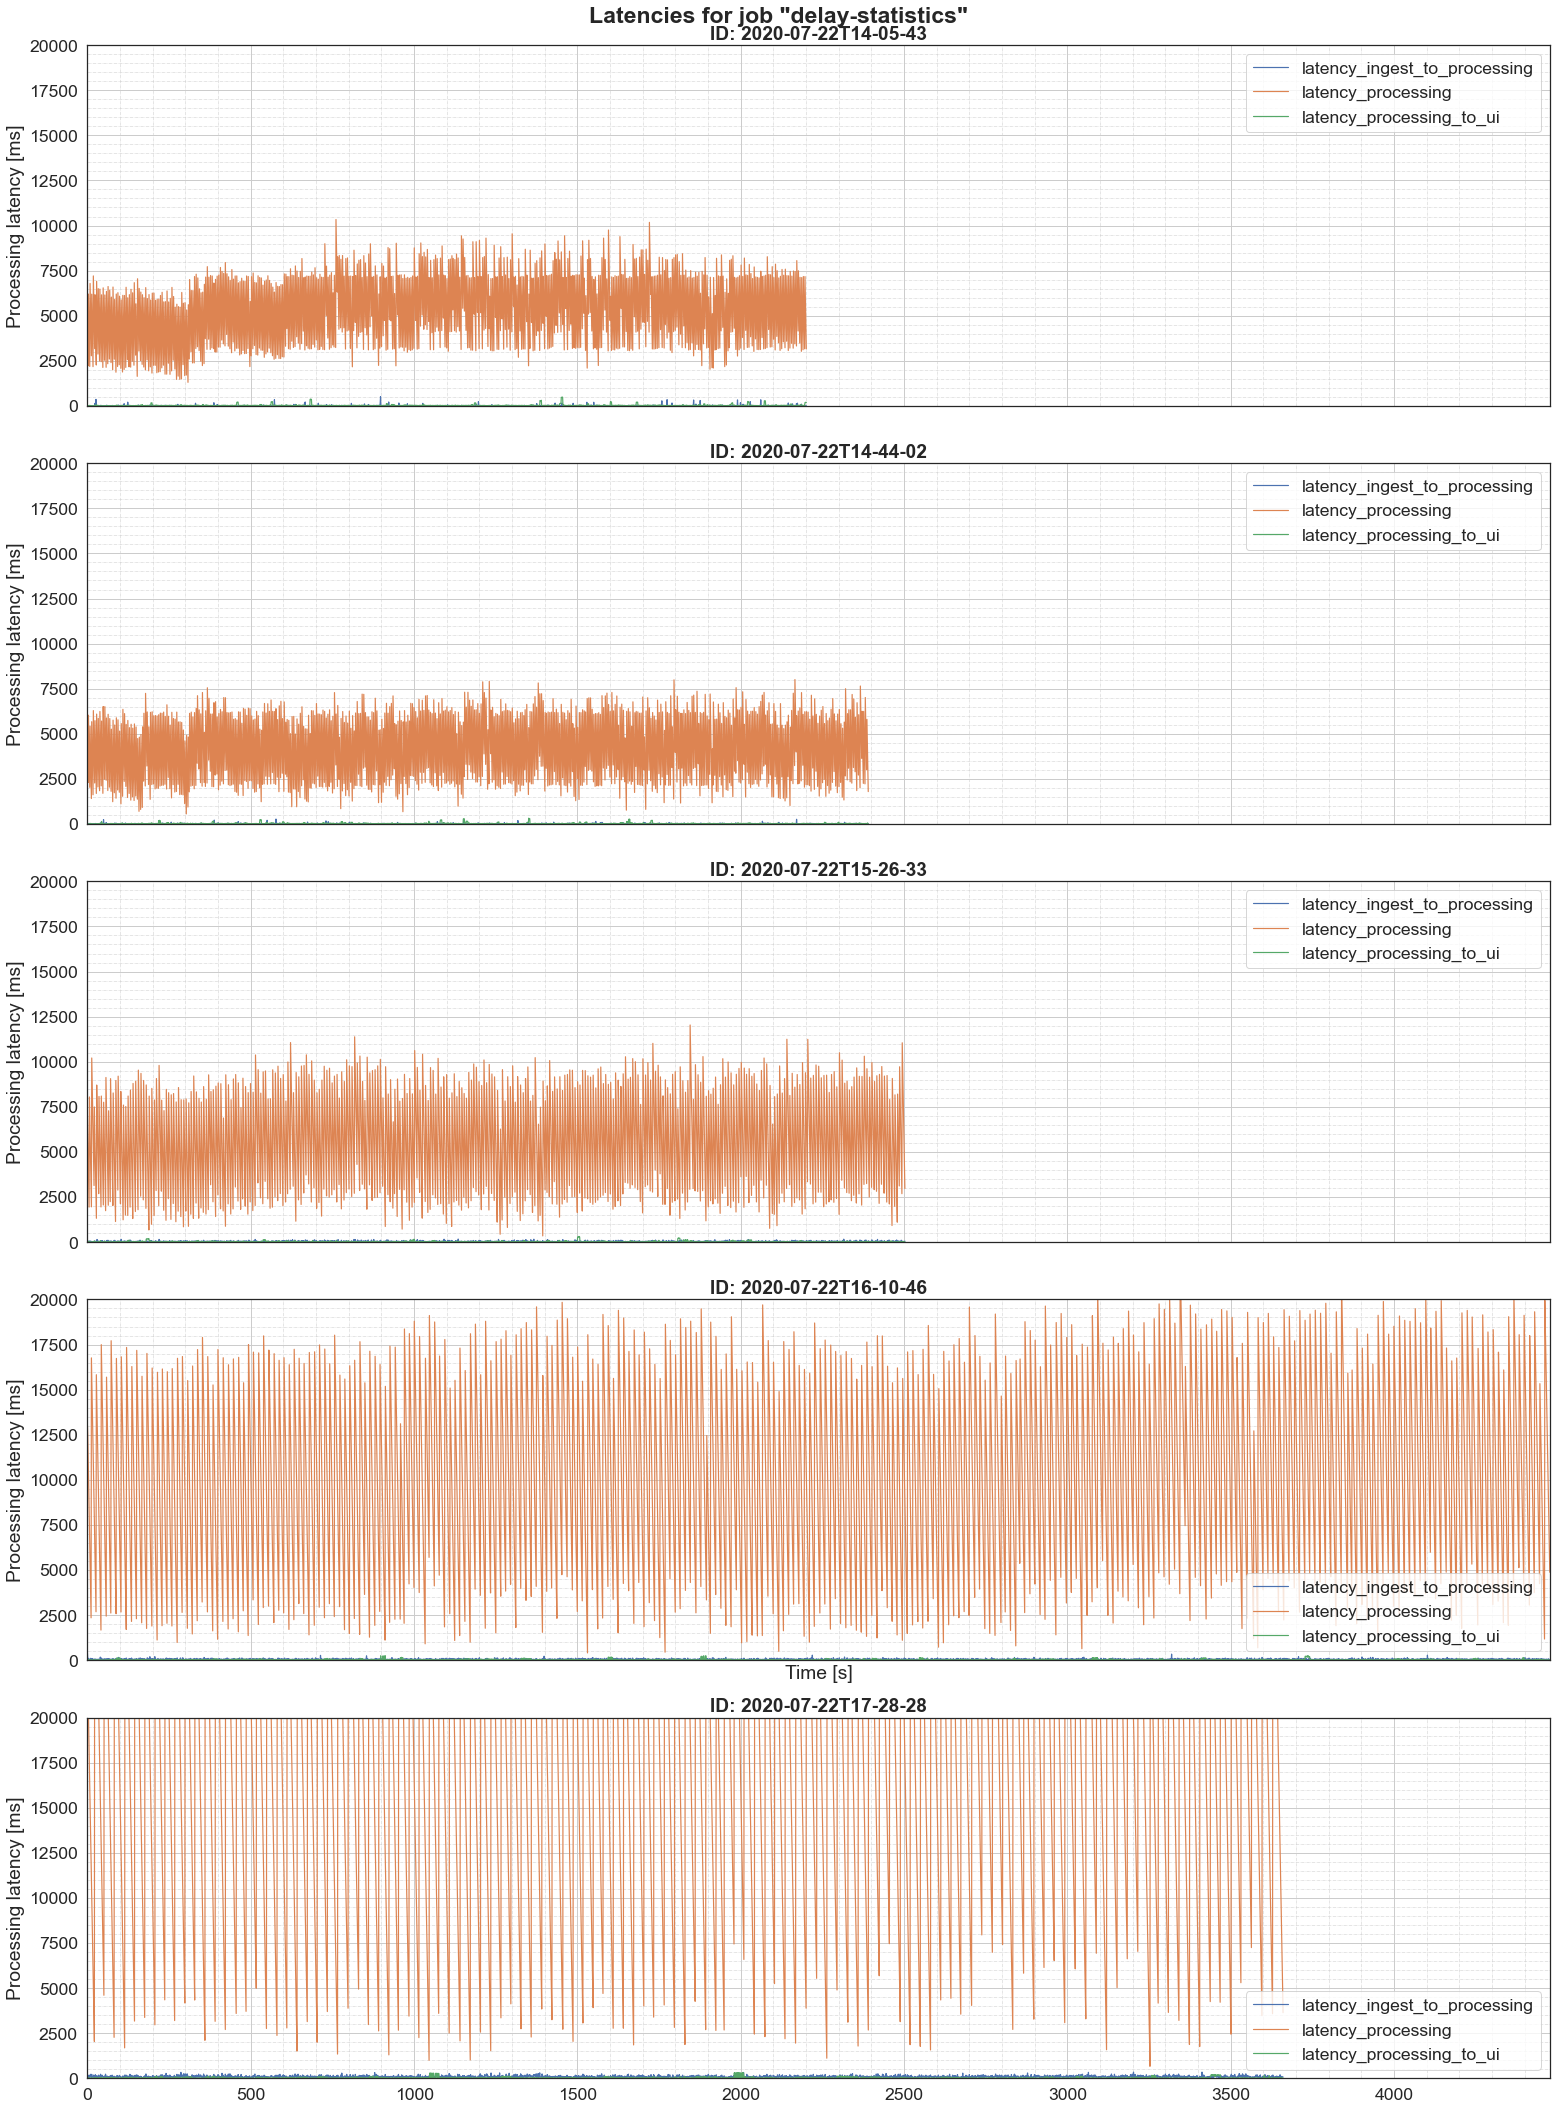

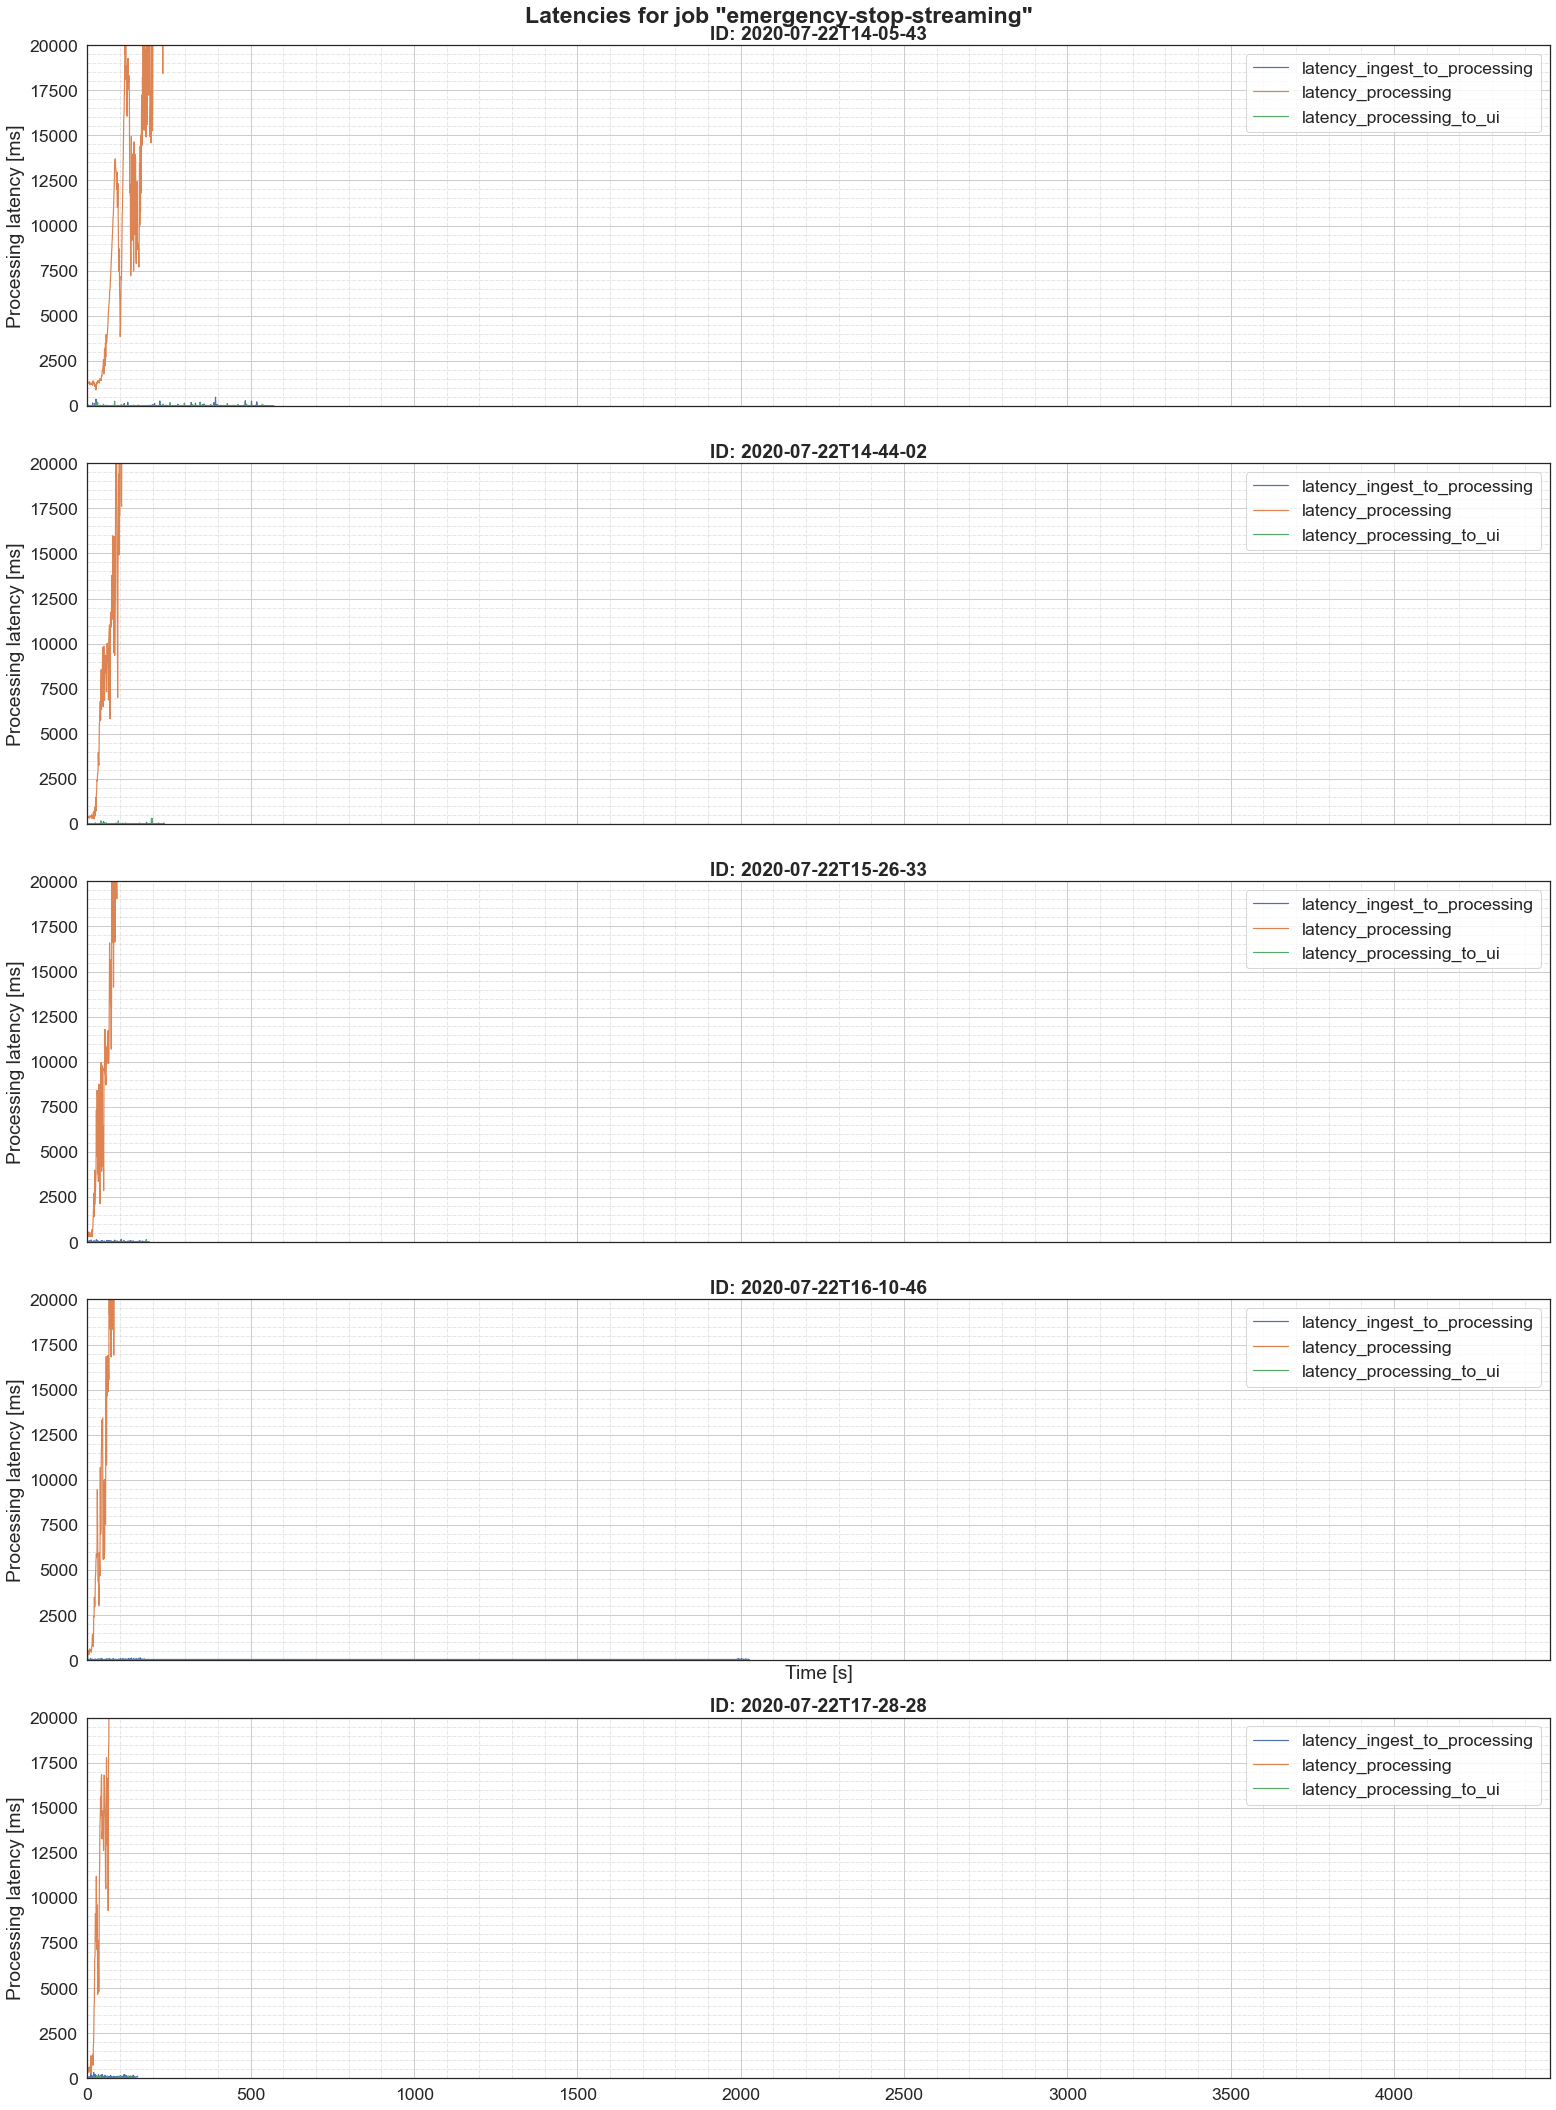

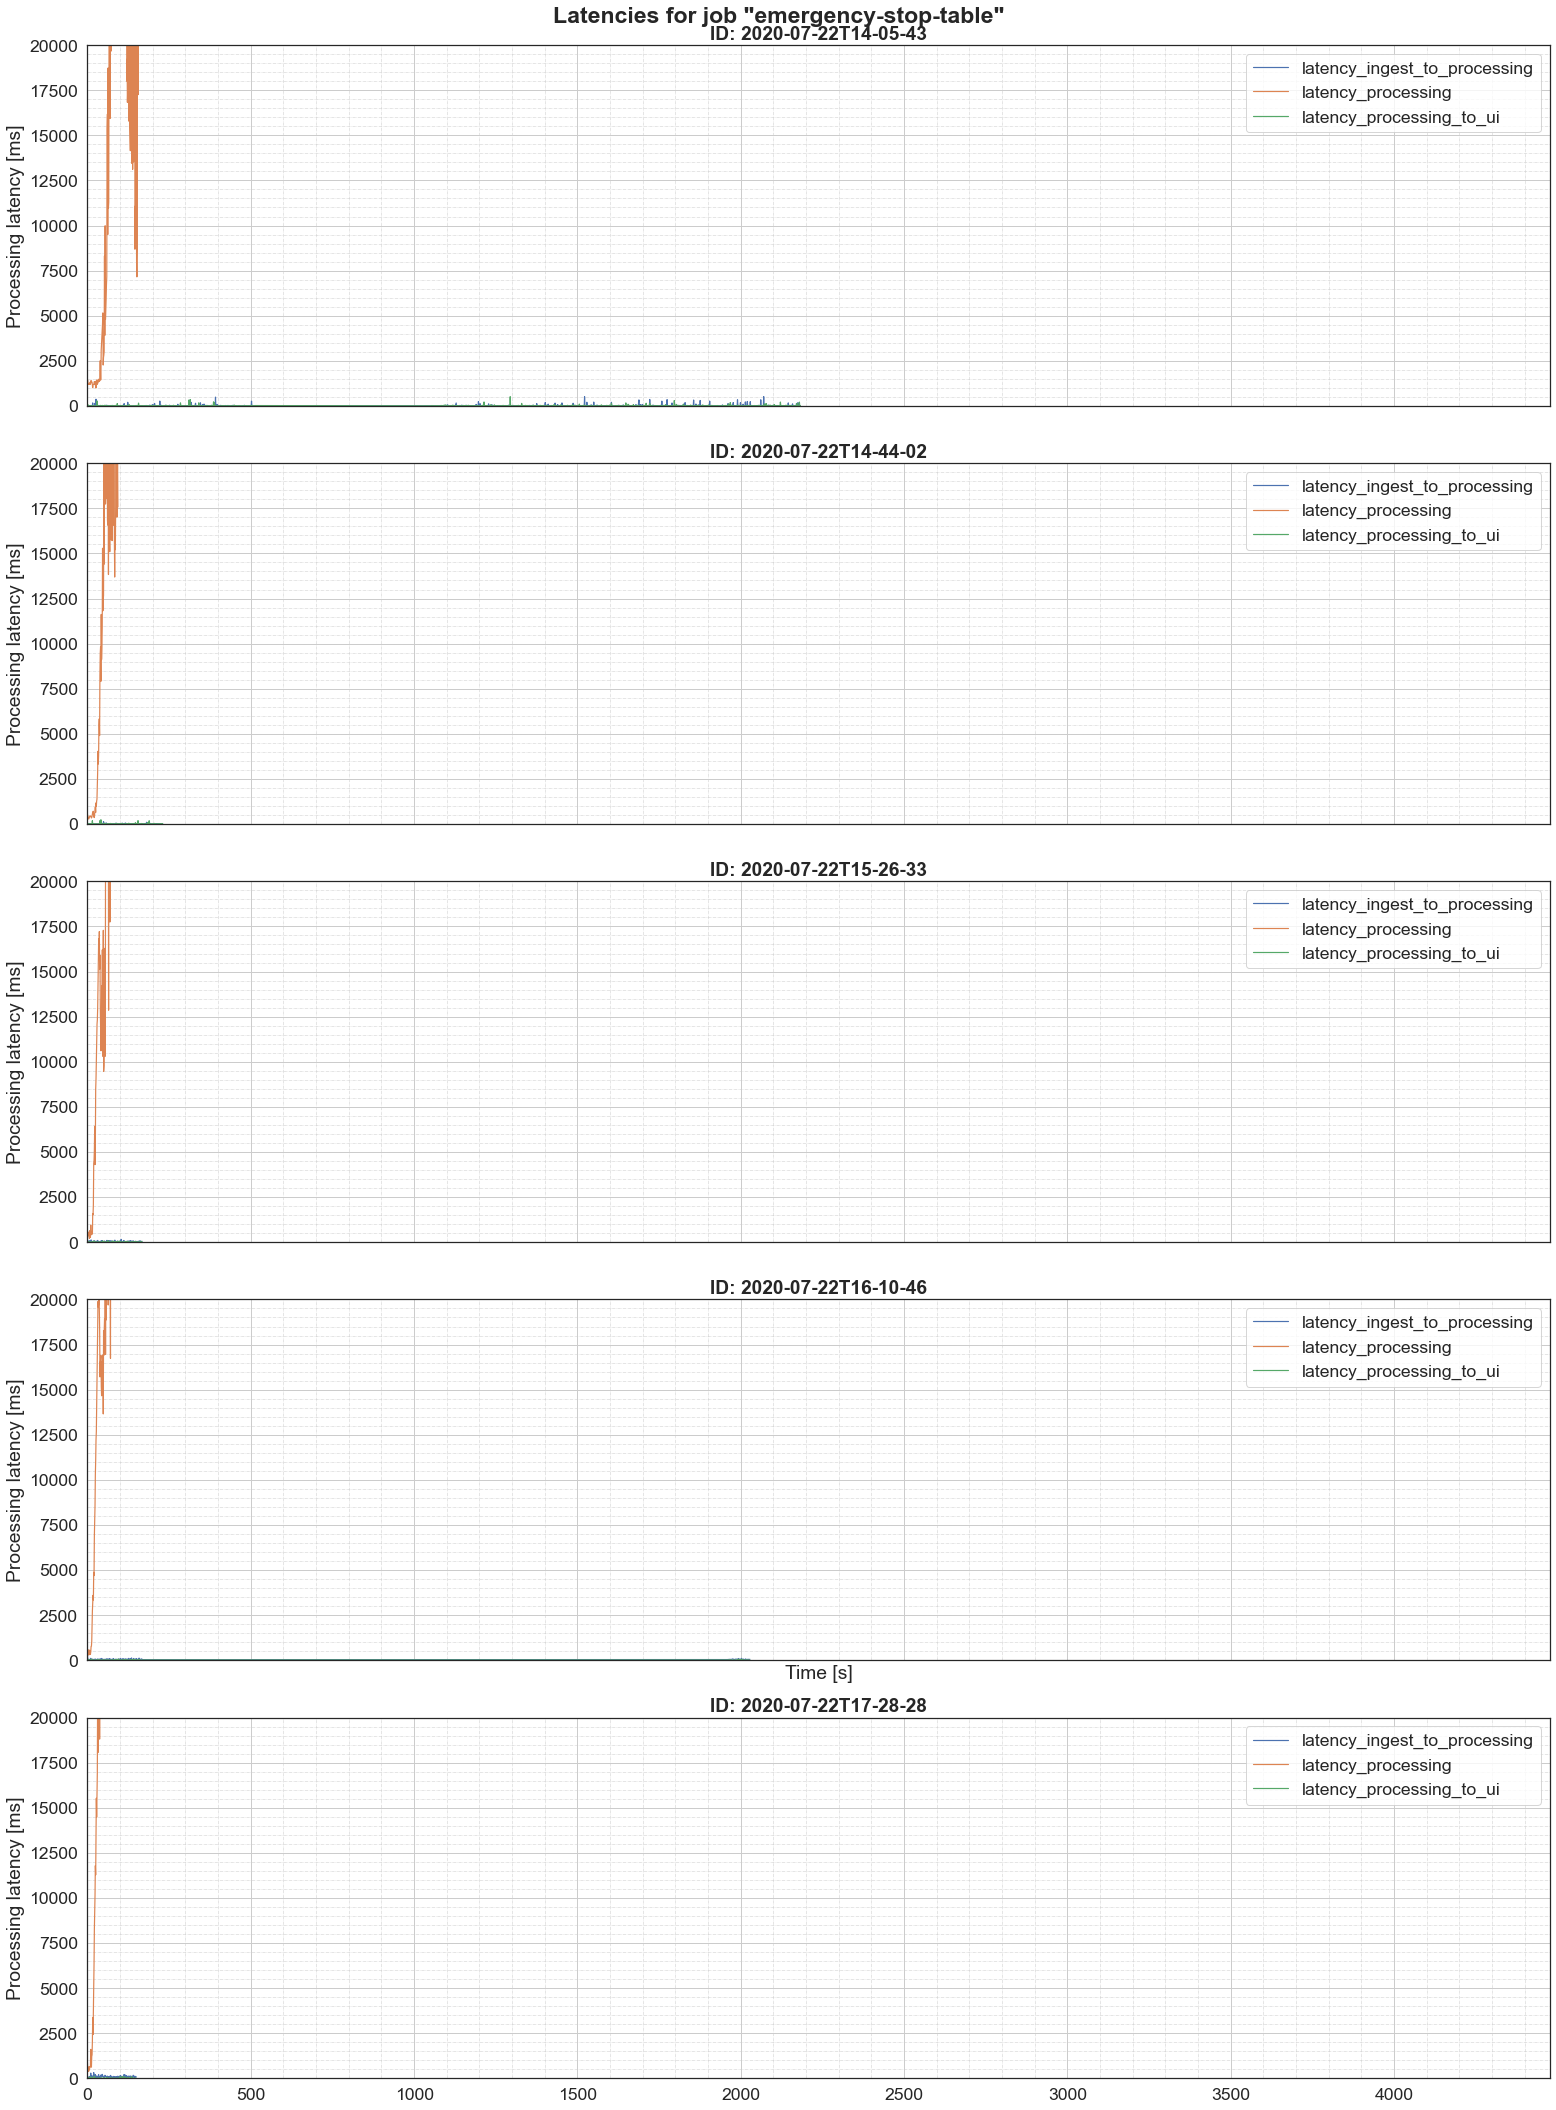

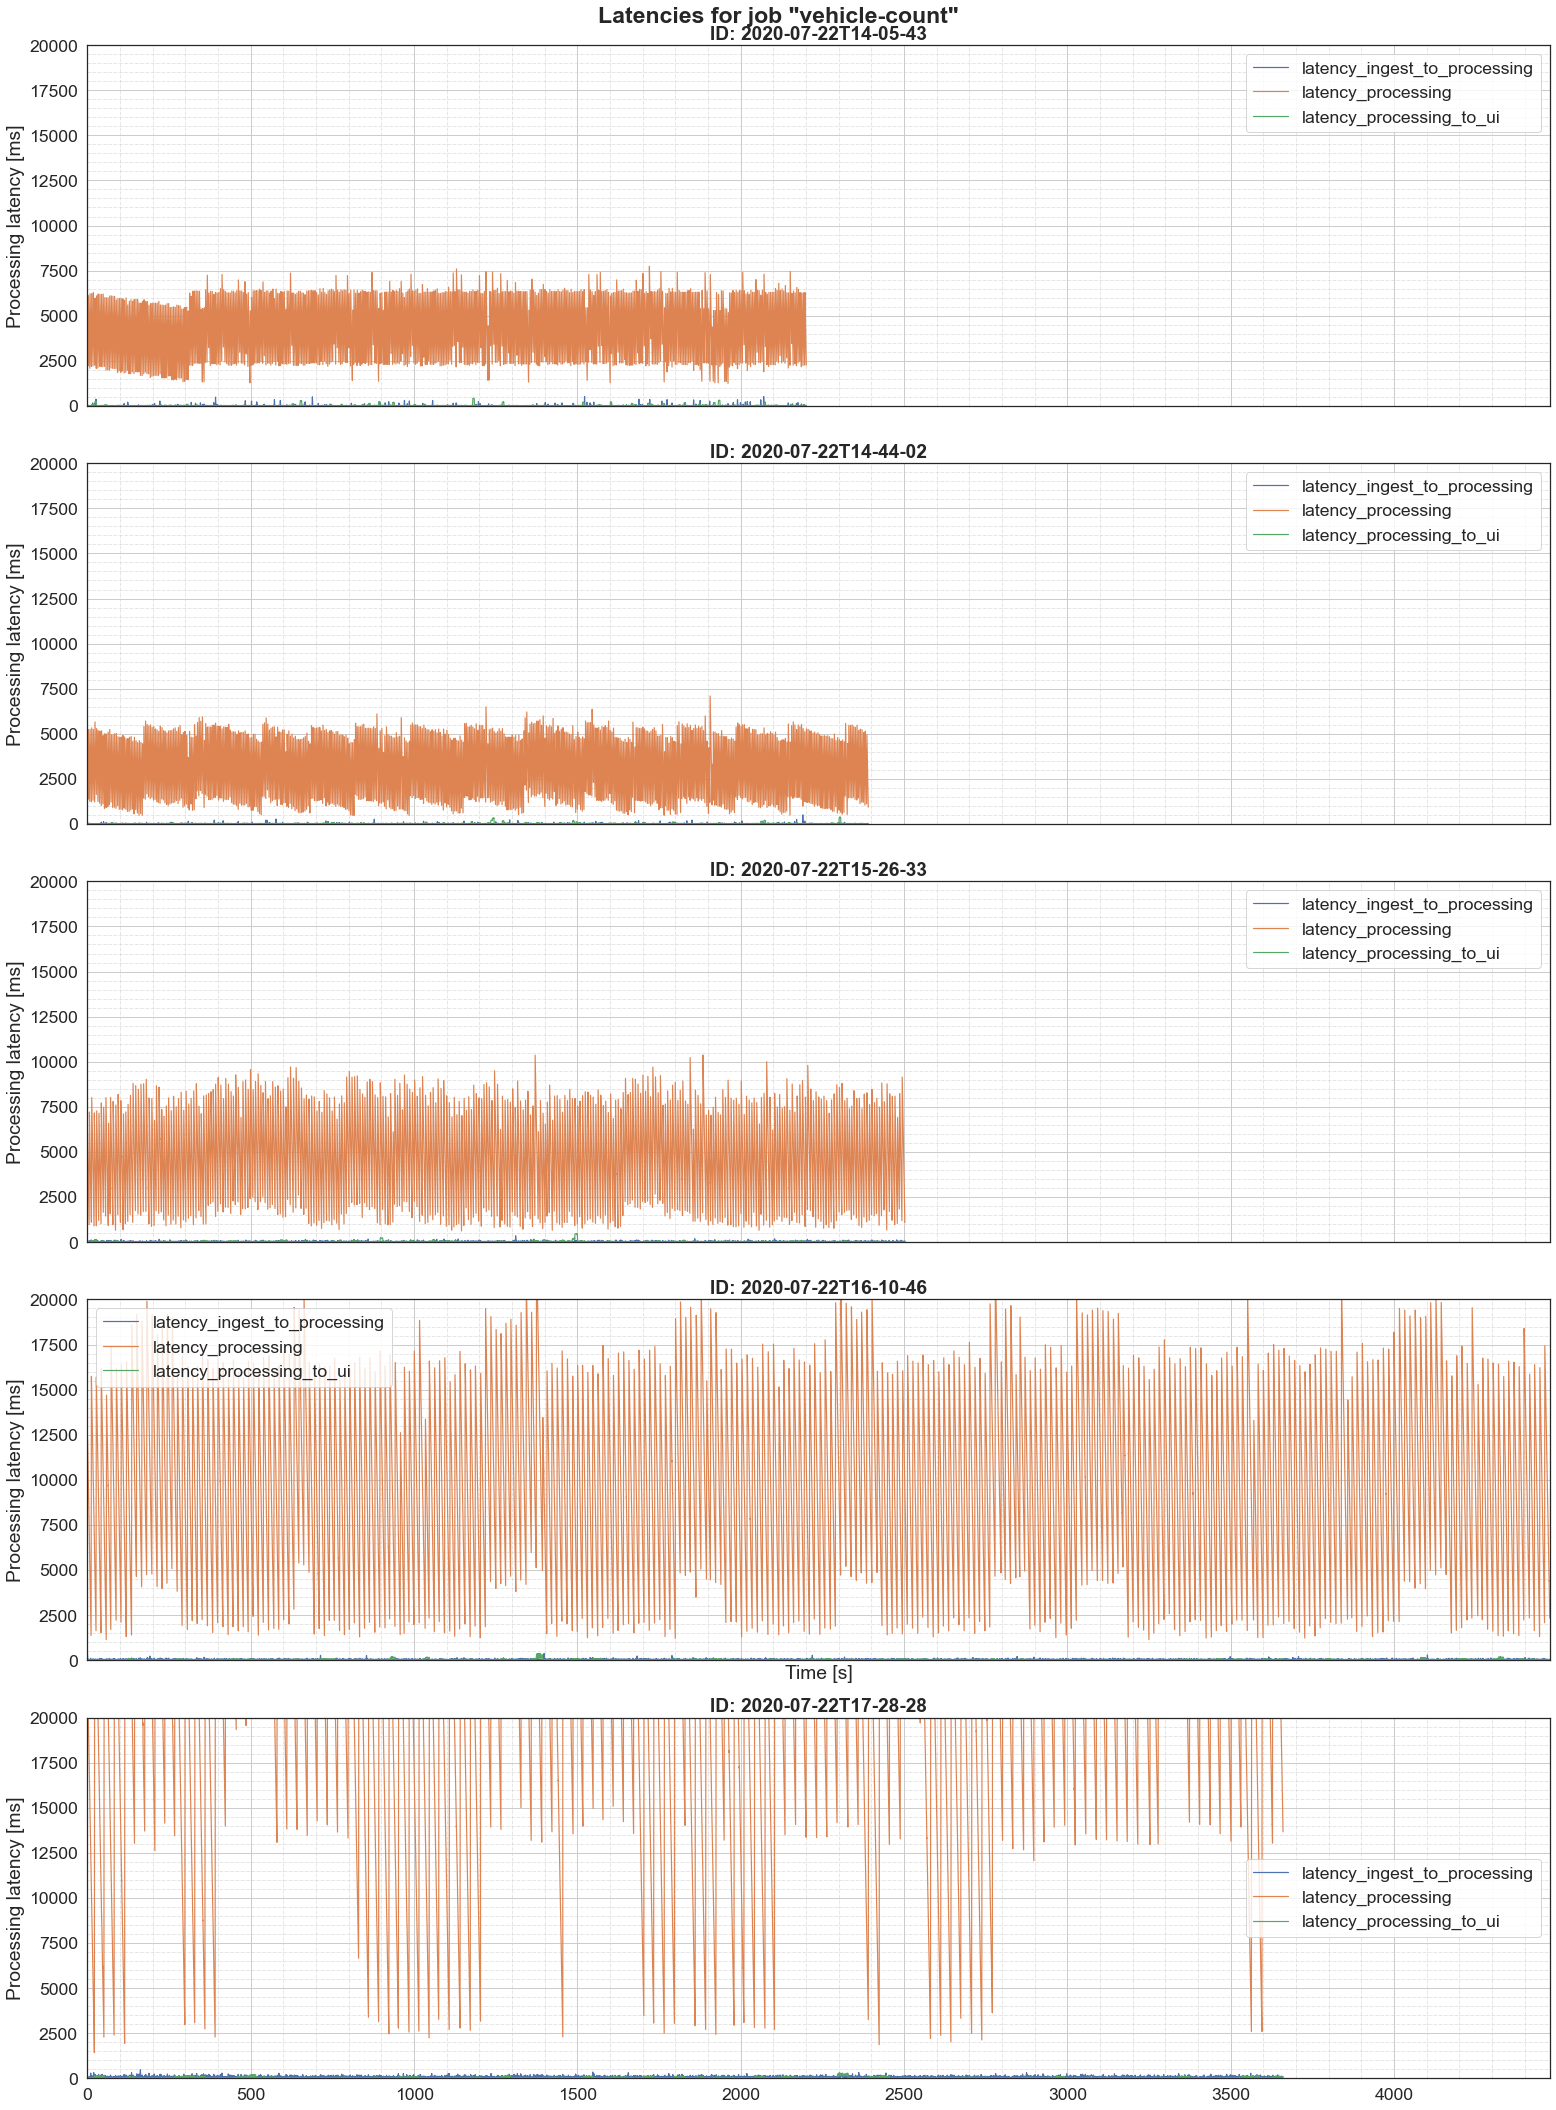

In [9]:
def plot_latency_over_time():
    latency_lim = min(20000, max_latency)
    for t_lim in [60, int(min(30 * 60 * 60, max_t))]:
        for job in jobs:
            fig, axs = plot_subplot(n_data)

            fig.suptitle(f"Latencies for job \"{job}\"")
            
            for i, (did, data) in enumerate(datas.items()):
                job_data = select_job(data, job)
                ax = axs[i]

                for col in latency_cols_no_e2e:
                    ax.plot(job_data["t"], job_data[col], label=col)
                        
                ax.set_xlim([0, t_lim])
                ax.set_ylim([0, latency_lim])
                ax.set_ylabel("Processing latency [ms]")
                ax.set_title(f"ID: {did}")
                ax.legend()
                if i+1 == len(jobs):
                    ax.set_xlabel("Time [s]")

            plot_format(fig, space_factor=2)
            plot_save(f"latency_trend_{job}_t{max_t}")
    
plot_latency_over_time()